In [1]:
import requests
import json 
from dotenv import dotenv_values

import pandas as pd

In [2]:
#Read private API key 
#Note: will need to deal with this with Heroku's config vars for deployment
config = dotenv_values('.env')
etsy_key = config['x-api-key']


In [3]:
headers = { 'x-api-key' : etsy_key }

# Part I: Download basic listing data (price, dimensions, materials, etc.) for all paintings for sale within a certain price range. 

## Preparatory Steps

### Get the full hierarchy tree of seller taxonomy nodes, to find the one I am interested in (paintings)

In [4]:
url_taxonomy = 'https://openapi.etsy.com/v3/application/seller-taxonomy/nodes'

In [5]:
response_taxonomy = requests.get(url_taxonomy, headers = headers)

In [6]:
response_taxonomy

<Response [200]>

In [7]:
response_taxonomy_data = response_taxonomy.json() 

In [8]:
response_taxonomy_data.keys()

dict_keys(['count', 'results'])

In [9]:
#results is a list of nested dictionaries
len(response_taxonomy_data['results'])

15

In [10]:
#lets's start with the main tree to see the 15 main categories and find where painting may be
[(main_category['name'], counter) for counter, main_category in enumerate(response_taxonomy_data['results'])]

[('Accessories', 0),
 ('Art & Collectibles', 1),
 ('Bags & Purses', 2),
 ('Bath & Beauty', 3),
 ('Books, Movies & Music', 4),
 ('Clothing', 5),
 ('Craft Supplies & Tools', 6),
 ('Electronics & Accessories', 7),
 ('Home & Living', 8),
 ('Jewelry', 9),
 ('Paper & Party Supplies', 10),
 ('Pet Supplies', 11),
 ('Shoes', 12),
 ('Toys & Games', 13),
 ('Weddings', 14)]

In [11]:
#Let's dive into Art and Collectibles
[(art_category['name'], counter) for counter, art_category in enumerate(response_taxonomy_data['results'][1]['children'])]
#response_taxonomy_data['results'][1]['children']

[('Collectibles', 0),
 ('Drawing & Illustration', 1),
 ('Fiber Arts', 2),
 ('Mixed Media & Collage', 3),
 ('Glass Art', 4),
 ('Painting', 5),
 ('Photography', 6),
 ('Prints', 7),
 ('Sculpture', 8),
 ('Dolls & Miniatures', 9),
 ('Artist Trading Cards', 10),
 ('Fine Art Ceramics', 11)]

In [12]:
#Let's look at painting
response_taxonomy_data['results'][1]['children'][5]

{'id': 105,
 'level': 2,
 'name': 'Painting',
 'parent_id': 66,
 'children': [{'id': 106,
   'level': 3,
   'name': 'Acrylic',
   'parent_id': 105,
   'children': [],
   'full_path_taxonomy_ids': [66, 105, 106]},
  {'id': 107,
   'level': 3,
   'name': 'Combination',
   'parent_id': 105,
   'children': [],
   'full_path_taxonomy_ids': [66, 105, 107]},
  {'id': 108,
   'level': 3,
   'name': 'Encaustics',
   'parent_id': 105,
   'children': [],
   'full_path_taxonomy_ids': [66, 105, 108]},
  {'id': 109,
   'level': 3,
   'name': 'Gouache',
   'parent_id': 105,
   'children': [],
   'full_path_taxonomy_ids': [66, 105, 109]},
  {'id': 110,
   'level': 3,
   'name': 'Ink',
   'parent_id': 105,
   'children': [],
   'full_path_taxonomy_ids': [66, 105, 110]},
  {'id': 111,
   'level': 3,
   'name': 'Mixed',
   'parent_id': 105,
   'children': [],
   'full_path_taxonomy_ids': [66, 105, 111]},
  {'id': 112,
   'level': 3,
   'name': 'Oil',
   'parent_id': 105,
   'children': [],
   'full_path_

In [13]:
#Paintings are themselves divided into different groups based on materials, and there are no more children, so I can now collect the taxonomy id's and the full path taxonomy id's just in case
paintings_taxonomy_list = [(painting_category['name'], painting_category['id'], painting_category['full_path_taxonomy_ids']) for painting_category in response_taxonomy_data['results'][1]['children'][5]['children']]
paintings_taxonomy_list

[('Acrylic', 106, [66, 105, 106]),
 ('Combination', 107, [66, 105, 107]),
 ('Encaustics', 108, [66, 105, 108]),
 ('Gouache', 109, [66, 105, 109]),
 ('Ink', 110, [66, 105, 110]),
 ('Mixed', 111, [66, 105, 111]),
 ('Oil', 112, [66, 105, 112]),
 ('Spray Paint', 113, [66, 105, 113]),
 ('Watercolor', 114, [66, 105, 114])]

### Paintings taxonomy

In [14]:
paintings_taxonomy_df = pd.DataFrame(paintings_taxonomy_list, columns = ['Material','Taxonomy Id','Full path Id'])

In [15]:
paintings_taxonomy_df

,Material,Taxonomy Id,Full path Id
0,Acrylic,106,"[66, 105, 106]"
1,Combination,107,"[66, 105, 107]"
2,Encaustics,108,"[66, 105, 108]"
3,Gouache,109,"[66, 105, 109]"
4,Ink,110,"[66, 105, 110]"
5,Mixed,111,"[66, 105, 111]"
6,Oil,112,"[66, 105, 112]"
7,Spray Paint,113,"[66, 105, 113]"
8,Watercolor,114,"[66, 105, 114]"


In [143]:
#I am also adding the number of available paintings in the price range of my interest ($250-$500), which I manually checked (as of 10/5):
#paintings_taxonomy_df['num_listings_250to500USD']=[75333, 4084, 579, 1088, 1137, 6312, 77630, 354, 16597]
paintings_taxonomy_df['num_listings_250to750USD']=[92172, 5068, 721, 1299, 1371, 8026, 97396, 422, 19796]

In [142]:
paintings_taxonomy_df

,Material,Taxonomy Id,Full path Id,num_listings_250to750USD
0,Acrylic,106,"[66, 105, 106]",92172
1,Combination,107,"[66, 105, 107]",5068
2,Encaustics,108,"[66, 105, 108]",721
3,Gouache,109,"[66, 105, 109]",1299
4,Ink,110,"[66, 105, 110]",1371
5,Mixed,111,"[66, 105, 111]",8026
6,Oil,112,"[66, 105, 112]",97596
7,Spray Paint,113,"[66, 105, 113]",422
8,Watercolor,114,"[66, 105, 114]",19796


In [18]:
paintings_taxonomy_df['num_listings_250to750USD'].sum()

229471

In [19]:
paintings_taxonomy_df.set_index('Taxonomy Id')


,Material,Full path Id,num_listings_250to750USD
Taxonomy Id,,,
106,Acrylic,"[66, 105, 106]",95172
107,Combination,"[66, 105, 107]",5068
108,Encaustics,"[66, 105, 108]",721
109,Gouache,"[66, 105, 109]",1299
110,Ink,"[66, 105, 110]",1371
111,Mixed,"[66, 105, 111]",8026
112,Oil,"[66, 105, 112]",97596
113,Spray Paint,"[66, 105, 113]",422
114,Watercolor,"[66, 105, 114]",19796


In [20]:
paintings_taxonomy_df.set_index('Taxonomy Id').loc[106]

Material                           Acrylic
Full path Id                [66, 105, 106]
num_listings_250to750USD             95172
Name: 106, dtype: object

In [21]:
#Now let's request the properties given for each listing in these categories, with a separate request
url_properties_acrylic = 'https://openapi.etsy.com/v3/application/seller-taxonomy/nodes/106/properties'
response_properties_acrylic = requests.get(url_properties_acrylic, headers = headers)
response_properties_acrylic_data = response_properties_acrylic.json() 

In [22]:
response_properties_acrylic_data.keys()

dict_keys(['count', 'results'])

In [23]:
paintings_property_list_acrylic = [(painting_property['property_id'], painting_property['name']) for painting_property in response_properties_acrylic_data['results']]
paintings_property_list_acrylic

[(200, 'Primary color'),
 (52047899002, 'Secondary color'),
 (400394338806, 'Art subject'),
 (570246213481, 'Art style'),
 (145330288652, 'Home style'),
 (570246213482, 'Surface material'),
 (406291158455, 'Orientation'),
 (145330288558, 'Framing'),
 (47626759834, 'Height'),
 (47626759898, 'Width'),
 (54142602037, 'Depth'),
 (145330288592, 'Room'),
 (46803063659, 'Holiday'),
 (46803063641, 'Occasion'),
 (504, 'Diameter'),
 (501, 'Dimensions'),
 (502, 'Fabric'),
 (500, 'Finish'),
 (503, 'Flavor'),
 (506, 'Length'),
 (507, 'Material'),
 (508, 'Pattern'),
 (509, 'Scent'),
 (100, 'TeeShirtSize'),
 (510, 'Style'),
 (511, 'Weight'),
 (515, 'Device'),
 (513, 'Custom1'),
 (514, 'Custom2')]

In [24]:
#Let's check that the same properties and code apply to the other paintings' types, e.g. spray paint:

url_properties_spraypaint = 'https://openapi.etsy.com/v3/application/seller-taxonomy/nodes/113/properties'
response_properties_spraypaint = requests.get(url_properties_spraypaint, headers = headers)
response_properties_spraypaint_data = response_properties_spraypaint.json() 


In [25]:
paintings_property_list_spraypaint = [(painting_property['property_id'], painting_property['name']) for painting_property in response_properties_spraypaint_data['results']]
paintings_property_list_spraypaint

[(200, 'Primary color'),
 (52047899002, 'Secondary color'),
 (400394338806, 'Art subject'),
 (570246213481, 'Art style'),
 (145330288652, 'Home style'),
 (570246213482, 'Surface material'),
 (406291158455, 'Orientation'),
 (145330288558, 'Framing'),
 (47626759834, 'Height'),
 (47626759898, 'Width'),
 (54142602037, 'Depth'),
 (145330288592, 'Room'),
 (46803063659, 'Holiday'),
 (46803063641, 'Occasion'),
 (504, 'Diameter'),
 (501, 'Dimensions'),
 (502, 'Fabric'),
 (500, 'Finish'),
 (503, 'Flavor'),
 (506, 'Length'),
 (507, 'Material'),
 (508, 'Pattern'),
 (509, 'Scent'),
 (100, 'TeeShirtSize'),
 (510, 'Style'),
 (511, 'Weight'),
 (515, 'Device'),
 (513, 'Custom1'),
 (514, 'Custom2')]

In [26]:
#So this confirms that the possible properties for a painting don't change by material 

In [27]:
paintings_properties_df = pd.DataFrame(paintings_property_list_spraypaint, columns = ['Property Id','Property'])

In [28]:
paintings_properties_df

,Property Id,Property
0,200,Primary color
1,52047899002,Secondary color
2,400394338806,Art subject
3,570246213481,Art style
4,145330288652,Home style
5,570246213482,Surface material
6,406291158455,Orientation
7,145330288558,Framing
8,47626759834,Height
9,47626759898,Width


### Test GET request of the 'find all listings' type

limit = num. listings to return (1-100, default 25)

offset = for skipping responses (default 0)

#keywords = search term or phrase that must appear (e.g. tree)

sort_on = can be ('created', 'price', 'updated', default 'created')

sort_order = 'ascending' or 'descending'

min_price, max_price 

taxonomy_id = code for the type of painting: (106-114, 106 = acrylic, ...., 114=watercolor)

In [29]:
params = { 'limit' :100, #listings to return (1-100, default 25)
            'offset' : 0,  #for skipping responses (default 0)
            'sort_on': 'price',  #can be ('created', 'price', 'updated', default 'created')
            'sort_order' : 'ascending', #'descending'
             'min_price' : 250.0,
             'max_price' : 750.0,
             'taxonomy_id' : 106 #106 = acrylic, ...., 114=watercolor 
         }

In [30]:
url_listings_active = 'https://openapi.etsy.com/v3/application/listings/active'

In [31]:
response_paintings_active = requests.get(url_listings_active, params=params, headers = headers)

In [32]:
response_paintings_active

<Response [200]>

In [33]:
response_paintings_active_data = response_paintings_active.json() 

In [34]:
response_paintings_active_data.keys()

dict_keys(['count', 'results'])

In [35]:
response_paintings_active_data['results'][0:2]

[{'listing_id': 709728321,
  'user_id': 51263324,
  'shop_id': 9800755,
  'title': 'Original Orchid Flower Painting, Flower Painting Still Life, Small Original Painting',
  'description': 'Acrylic on Hardboard',
  'state': 'active',
  'creation_timestamp': 1631647252,
  'ending_timestamp': 1642191652,
  'original_creation_timestamp': 1559054965,
  'last_modified_timestamp': 1631647252,
  'state_timestamp': 1569768624,
  'quantity': 1,
  'shop_section_id': 26402930,
  'featured_rank': -1,
  'url': 'https://www.etsy.com/listing/709728321/original-orchid-flower-painting-flower',
  'num_favorers': 29,
  'non_taxable': False,
  'is_customizable': False,
  'is_personalizable': False,
  'personalization_is_required': False,
  'personalization_char_count_max': None,
  'personalization_instructions': None,
  'listing_type': 0,
  'tags': ['Floral Painting',
   'Still Life Painting',
   'Orchid Painting',
   'Flower Painting',
   'Acrylic Painting',
   'Anniversary Gift',
   'Birthday Gift',
   '

In [36]:
first_100acrylic_paintings_df =  pd.DataFrame(response_paintings_active_data['results'],columns=['listing_id','user_id','shop_id','title','num_favorers','url','materials','item_length','item_width','item_dimensions_unit','style','price','taxonomy_id'])

In [37]:
first_100acrylic_paintings_df

,listing_id,user_id,shop_id,title,num_favorers,url,materials,item_length,item_width,item_dimensions_unit,style,price,taxonomy_id
0,709728321,51263324,9800755,"Original Orchid Flower Painting, Flower Painti...",29,https://www.etsy.com/listing/709728321/origina...,"[Acrylic, Hardboard]",24,18,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
1,819018692,221539362,20402975,"Long wall art, Oversized wall art, Large Abstr...",2,https://www.etsy.com/listing/819018692/long-wa...,"[acrylic, pastels, paper roll]",None,None,None,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
2,1076101360,74239808,25674777,Deep Blue Sea,0,https://www.etsy.com/listing/1076101360/deep-b...,[],20,1,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
3,1001369872,440513424,27718104,Colosal ocean wave,0,https://www.etsy.com/listing/1001369872/colosa...,[Stretched canvas],23.5,1.5,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
4,968717160,21677727,6902246,Freedom 8x10 framed,0,https://www.etsy.com/listing/968717160/freedom...,[],10,8,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,895747673,230092638,20768657,Peacock,0,https://www.etsy.com/listing/895747673/peacock,[Stretched canvas],16,12,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
96,828089877,13023446,12985729,Peonies for my father,1,https://www.etsy.com/listing/828089877/peonies...,[Stretched canvas],35,28,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
97,771054512,273090558,22377768,Guacamole Architecture. Abstract art and divin...,0,https://www.etsy.com/listing/771054512/guacamo...,"[acrylic, metallic]",25,17,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106
98,583235330,64566326,11093744,Pure - Original Artwork,0,https://www.etsy.com/listing/583235330/pure-or...,"[glass, acrylic, paint, gold, blue, red, white...",42,11,in,[],"{'amount': 25000, 'divisor': 100, 'currency_co...",106


In [38]:
first_100acrylic_paintings_df =  pd.DataFrame(response_paintings_active_data['results'])
first_100acrylic_paintings_df

,listing_id,user_id,shop_id,title,description,state,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,...,item_dimensions_unit,is_private,style,file_data,has_variations,should_auto_renew,language,price,taxonomy_id,production_partners
0,709728321,51263324,9800755,"Original Orchid Flower Painting, Flower Painti...",Acrylic on Hardboard,active,1631647252,1642191652,1559054965,1631647252,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
1,819018692,221539362,20402975,"Long wall art, Oversized wall art, Large Abstr...","Long wall art, Oversized wall art, Large Abstr...",active,1629146443,1639690843,1593681450,1633613182,...,None,False,[],,True,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
2,1076101360,74239808,25674777,Deep Blue Sea,Bucket of blues in this acrylic painting on a ...,active,1632432869,1642977269,1632432869,1632632468,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
3,1001369872,440513424,27718104,Colosal ocean wave,Abstract modern acrylic painting,active,1631137250,1641681650,1620423588,1631137250,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
4,968717160,21677727,6902246,Freedom 8x10 framed,Freedom \n8x10 in a high quality frame \nAll p...,active,1626605436,1637236236,1615978050,1626605436,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,895747673,230092638,20768657,Peacock,Blue Peacock \nPainting on stretched canvas\n\...,active,1604083431,1614541431,1604082908,1616747092,...,in,False,[],,False,False,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
96,828089877,13023446,12985729,Peonies for my father,Acrylic painting of peonies in a vase\n- paint...,active,1624637433,1635178233,1592841613,1624637433,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
97,771054512,273090558,22377768,Guacamole Architecture. Abstract art and divin...,Guacamole Architecture is part of a larger ser...,active,1626035433,1636666233,1583614746,1626035433,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
98,583235330,64566326,11093744,Pure - Original Artwork,This original piece is sure to make a statemen...,active,1625725230,1636356030,1519801011,1625725230,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]


In [39]:
#Other available requests are: 'FindAllActiveListingsbyShop', 'getListing' (to get a single listing), 'getListingsByListingIds' (pass a list of ids),  'getListingProperties' (to return a single property by id)
#'getAllListingFiles' that returns all the files associated to a listing (including images?) - this requires OAuth2 

In [40]:
#Test of concatenation
first50acrylic_paintings_df = first_100acrylic_paintings_df.iloc[:50]

In [41]:
second50acrylic_paintings_df = first_100acrylic_paintings_df.iloc[50:]

In [42]:
first50acrylic_paintings_df = pd.concat([first50acrylic_paintings_df,second50acrylic_paintings_df])

In [43]:
first50acrylic_paintings_df

,listing_id,user_id,shop_id,title,description,state,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,...,item_dimensions_unit,is_private,style,file_data,has_variations,should_auto_renew,language,price,taxonomy_id,production_partners
0,709728321,51263324,9800755,"Original Orchid Flower Painting, Flower Painti...",Acrylic on Hardboard,active,1631647252,1642191652,1559054965,1631647252,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
1,819018692,221539362,20402975,"Long wall art, Oversized wall art, Large Abstr...","Long wall art, Oversized wall art, Large Abstr...",active,1629146443,1639690843,1593681450,1633613182,...,None,False,[],,True,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
2,1076101360,74239808,25674777,Deep Blue Sea,Bucket of blues in this acrylic painting on a ...,active,1632432869,1642977269,1632432869,1632632468,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
3,1001369872,440513424,27718104,Colosal ocean wave,Abstract modern acrylic painting,active,1631137250,1641681650,1620423588,1631137250,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
4,968717160,21677727,6902246,Freedom 8x10 framed,Freedom \n8x10 in a high quality frame \nAll p...,active,1626605436,1637236236,1615978050,1626605436,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,895747673,230092638,20768657,Peacock,Blue Peacock \nPainting on stretched canvas\n\...,active,1604083431,1614541431,1604082908,1616747092,...,in,False,[],,False,False,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
96,828089877,13023446,12985729,Peonies for my father,Acrylic painting of peonies in a vase\n- paint...,active,1624637433,1635178233,1592841613,1624637433,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
97,771054512,273090558,22377768,Guacamole Architecture. Abstract art and divin...,Guacamole Architecture is part of a larger ser...,active,1626035433,1636666233,1583614746,1626035433,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]
98,583235330,64566326,11093744,Pure - Original Artwork,This original piece is sure to make a statemen...,active,1625725230,1636356030,1519801011,1625725230,...,in,False,[],,False,True,en-US,"{'amount': 25000, 'divisor': 100, 'currency_co...",106,[]


In [44]:
test = first50acrylic_paintings_df.iloc[98]['price']
test['amount']/test['divisor']

250.0

## Here is the actual loop requesting, organizing and saving all paintings listings of a particular material (from code 106=acrylic to code 114=watercolor) within the $250-750 price range  

In [46]:
from ediblepickle import checkpoint
import os
from urllib.parse import quote

cache_dir = './Git_exclude/cache'
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

In [47]:
import time

In [48]:
from retrying import retry

In [49]:
url_listings_active = 'https://openapi.etsy.com/v3/application/listings/active'

In [144]:
#This is the main workhorse function  to get 100 listings at a time, transform to dataframe and 
#the first decorator saves the results of any call with given parameters to cache, the second one keeps retrying if attampts fail
@retry(stop_max_attempt_number=100,wait_fixed=1000)
@checkpoint(key=lambda args, kwargs: 'tax'+ str(args[0]) + '_off'+ str(args[1]) + '_from' +str(int(min_price)) +'.pkl', work_dir=cache_dir)
def get_100painting_listings(taxonomy_id,offset,min_price,max_price):
    #basic parameters for the getAllListings call
    params = {'limit' :100, #listings to return (1-100, default 25)
            'offset' : offset,  #for skipping responses (default 0, it seems to work only up to 12000)
            'sort_on': 'price',  #can be ('created', 'price', 'updated', default 'created')
            'sort_order' : 'ascending', #'descending'
             'min_price' : min_price,
             'max_price' : max_price,
             'taxonomy_id' : taxonomy_id #106 = acrylic, 107 = combination,  ...., 114=watercolor 
              }
    response_100paintings = requests.get(url_listings_active, params=params, headers = headers)
    response_100paintings_data = response_100paintings.json() 
    response_100paintings_df =  pd.DataFrame(response_100paintings_data['results'])
    return response_100paintings_df

In [118]:
#I want a function to format the prices, that are returned by Etsy as a weird string like:
#"{'amount': 25000, 'divisor': 100, 'currency_code': 'USD'}"
#I want to convert the price into a floating value (amount/divisor) and throw away price that are not in USDollars as that would throw off my algorithm
import numpy as np
def format_price_USD(price_field_Etsy):
    if price_field_Etsy['currency_code']=='USD':
        return price_field_Etsy['amount']/price_field_Etsy['divisor']
    else:
        return np.nan

In [51]:
#Testing the basic iteration on taxonomy_id = 107 (combination) since there shouldn't be too many of these listings

# taxonomy_id = 107

# min_price = 250.0
# max_price = 750.0

# tax107_filename = './Git_exclude/Data/tax107_all_paintings_from_USD250.csv'

# #If the files with the listing data already exists for this taxonomy id, I load it:
# try:
#     tax107_all_paintings_df_test = pd.read_csv(tax107_filename)

#     print('Loaded listings file for taxonomy id 107.')

# except:

#     #Let's launch it a first time to initialize the dataframe with the first 100 listings of a given type
#     offset = 0
#     tax107_all_paintings_df = get_100painting_listings(taxonomy_id,offset,min_price,max_price)
    
#     #Then iterate over all paintings of that same type, which number is given in the paintings taxonomy df filled earlier
#     tax107_num_listings = paintings_taxonomy_df.set_index('Taxonomy Id').loc[107]['num_listings_250to750USD']
#     tax107_offsets_list = range(100,tax107_num_listings,100)
    
#     for offset in tax107_offsets_list:
#         tax107_100paintings_df = get_100painting_listings(107,offset,min_price,max_price)
#         tax107_all_paintings_df = pd.concat([tax107_all_paintings_df, tax107_100paintings_df])
#         time.sleep(1)
    
#     #save to .csv file
#     tax107_all_paintings_df.to_csv(tax107_filename,index=False)
        
#     print('Saved listings file for taxonomy id 107.')    

In [52]:
#Testing a more complicated iteration on taxonomy_id = 114, which has ~20000 entries, but I want to break the results into chunks of at most 12000 entries each
#because request calls with offset>=12000 fail and so need to be handled appropriately

# taxonomy_id = 114

# tax114_filename = './Git_exclude/Data/tax114_all_paintings_from_USD250.csv'

# #total number of listings:
# tax_id_num_listings = paintings_taxonomy_df.set_index('Taxonomy Id').loc[taxonomy_id]['num_listings_250to750USD']
# tax_id_num_listings

# #starting offsets for each chunk:
# starting_offsets = range(0,tax_id_num_listings,12000)

# min_price = 250.0
# max_price = 750.0

# for i,starting_offset in enumerate(starting_offsets):
    
#     if i>0:
#         tax114_next_csv_filename = tax114_filename[:-4]+f'_{i}.csv'
#     else:
#         tax114_next_csv_filename = tax114_filename
    

#     #If the files with the listing data already exists for this taxonomy id, I load it:
#     try:
#         tax_id_all_paintings_df = pd.read_csv(tax114_next_csv_filename)

#         print(f'Loaded listings file {tax114_next_csv_filename} for taxonomy id {taxonomy_id}.')

#     except:

#         #Since the GET request seem to work only for offset<=12000, i.e. only for the first iteration of this code, for the following iterations
#         #I use the following trick: after every multiple of 12000, I update the min price to look for and then use offset numbers modulo 12000
        
#         #Let's launch get_100painting_listings a first time to initialize the dataframe with the first 100 listings of a given type
#         tax_id_all_paintings_df = get_100painting_listings(taxonomy_id,starting_offset%12000,min_price,max_price)

#         #Then iterate attaching 100 painting listings at a time until reaching 12000 or the end
#         if i<(len(starting_offsets)-1):
#             tax_id_offsets_list = range(starting_offset+100,starting_offsets[i+1],100)
#         else:
#             tax_id_offsets_list = range(starting_offset+100,tax_id_num_listings,100)

#         for offset in tax_id_offsets_list:
#             tax_id_100paintings_df = get_100painting_listings(taxonomy_id,offset%12000,min_price,max_price)
#             tax_id_all_paintings_df = pd.concat([tax_id_all_paintings_df, tax_id_100paintings_df])
#             time.sleep(1)
            
#         #if I reached here and this is not the last call, update the min price to the next integer value so that the next block of 12000 offsets does not overlap with the previous
#         #set of entries:
#         if i<(len(starting_offsets)-1):
#             last_price_field = tax_id_all_paintings_df.iloc[-1]['price']
#             min_price = 0.1 + (last_price_field['amount']/last_price_field['divisor'])
            
#         #save to .csv file
#         tax_id_all_paintings_df.to_csv(tax114_next_csv_filename,index=False)
#         print(f'Saved listings file {tax114_next_csv_filename} for taxonomy id {taxonomy_id}.')

    

In [145]:
#Iterate over all taxonomies of interest

taxonomies_of_interest = [106, 107, 108, 109, 110, 111, 112, 113, 114]

for taxonomy_id in taxonomies_of_interest:

    min_price = 250.0
    max_price = 750.0
    
    csv_filename = f'./Git_exclude/Data/tax{taxonomy_id}_all_paintings_from_USD{int(min_price)}.csv'
    
    #total number of listings:
    tax_id_num_listings = paintings_taxonomy_df.set_index('Taxonomy Id').loc[taxonomy_id]['num_listings_250to750USD']

    #I want to break this into chunks of at most 12000 entries each (because requests with larger offsets fail)
    
    #starting offsets for each chunk:
    starting_offsets = range(0,tax_id_num_listings,12000)
    
    for i,starting_offset in enumerate(starting_offsets):

        if i>0:
            next_csv_filename = csv_filename[:-4]+f'_{i}.csv'
        else:
            next_csv_filename = csv_filename

        #If the files with the listing data already exists for this taxonomy id, I load it:
        try:
            tax_id_all_paintings_df = pd.read_csv(next_csv_filename)

            print(f'Loaded listings file {next_csv_filename} for taxonomy id {taxonomy_id}.')
            
            #if I reached here and this is not the last call, update the min price to the next decimal value so that the next block of 12000 offsets does not overlap with the previous
            #set of entries:
            if i<(len(starting_offsets)-1):
                last_price = tax_id_all_paintings_df.iloc[-1]['price']
                min_price = 0.1 + last_price
                print(min_price)

        except:

            #Since the GET request seem to work only for offset<=12000, i.e. only for the first iteration of this code, for the following iterations
            #I use the following trick: after every multiple of 12000, I update the min price to look for and then use offset numbers modulo 12000

            #Let's launch get_100painting_listings a first time to initialize the dataframe with the first 100 listings of a given type
            tax_id_all_paintings_df = get_100painting_listings(taxonomy_id,starting_offset%12000,min_price,max_price)

            #Then iterate attaching 100 painting listings at a time until reaching 12000 or the end
            if i<(len(starting_offsets)-1):
                tax_id_offsets_list = range(starting_offset+100,starting_offsets[i+1],100)
            else:
                tax_id_offsets_list = range(starting_offset+100,tax_id_num_listings,100)

            for offset in tax_id_offsets_list:
                tax_id_100paintings_df = get_100painting_listings(taxonomy_id,offset%12000,min_price,max_price)
                tax_id_all_paintings_df = pd.concat([tax_id_all_paintings_df, tax_id_100paintings_df])
                time.sleep(1)

            #clean the price column by making it into a float and removing if currency is not USD    
            tax_id_all_paintings_df['price']=tax_id_all_paintings_df['price'].apply(format_price_USD)
            tax_id_all_paintings_df.dropna(axis=0,subset=['price'],inplace=True)
                
            #if I reached here and this is not the last call, update the min price to the next decimal value so that the next block of 12000 offsets does not overlap with the previous
            #set of entries:
            if i<(len(starting_offsets)-1):
                last_price = tax_id_all_paintings_df.iloc[-1]['price']
                min_price = 0.1 + last_price

            #save to .csv file
            tax_id_all_paintings_df.to_csv(next_csv_filename,index=False)
            print(f'Saved listings file {next_csv_filename} for taxonomy id {taxonomy_id}.')


Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250.csv for taxonomy id 106.
270.1
Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_1.csv for taxonomy id 106.
300.1
Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_2.csv for taxonomy id 106.
350.1
Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_3.csv for taxonomy id 106.
400.1
Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_4.csv for taxonomy id 106.
457.65000000000003
Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_5.csv for taxonomy id 106.
529.1
Loaded listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_6.csv for taxonomy id 106.
648.1
Saved listings file ./Git_exclude/Data/tax106_all_paintings_from_USD250_7.csv for taxonomy id 106.


# PART 2: Reorganize downloaded raw files, combine taxonomy types, remove entries without critical information (dimensions, etc.), etc

In [147]:
#The taxonomy numbers are quite skewed: >50000 entries for 106 (acrylic) and 112 (oil), around 15000 for 114 (watercolor), around 4-5000 each for 107 (Combination) and 111 (Mixed),
#but less than 1000 for all the other taxonomies. Hence I will drop all these other minor taxonomies, combine 107 and 111 in a new 'More than one' category and will at the end
#have 4 categories: acrylic, oil, watercolor, more_than_one

In [ ]:
#I will use taxonomy 114 (watercolors) as the example one to refine the data-cleaning pipeline because it has enough entries that the data is split into more than one file,
#but is not as large as oil or acrylic which have 8 files each

In [148]:
taxonomy_id = 114

csv_filename_pattern = f'./Git_exclude/Data/tax{taxonomy_id}_all_paintings*.csv'


In [149]:
csv_filename_pattern

'./Git_exclude/Data/tax114_all_paintings*.csv'

In [152]:
import glob

tax_csv_files = glob.glob(csv_filename_pattern)
tax_csv_files

['./Git_exclude/Data\\tax114_all_paintings_from_USD250.csv',
 './Git_exclude/Data\\tax114_all_paintings_from_USD250_1.csv']

In [153]:
tax_114_paintings_df_temp = pd.read_csv(tax_csv_files[0])

In [154]:
tax_114_paintings_df_temp.head()

,listing_id,user_id,shop_id,title,description,state,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,...,item_dimensions_unit,is_private,style,file_data,has_variations,should_auto_renew,language,price,taxonomy_id,production_partners
0,1063112878,232977122,20883278,Dahlia in Bloom by Micaela Rish at The 220 Cafe,***THIS PAINTING IS NOT AVAILABLE TO BE SHIPPE...,active,1630430404,1640974804,1630430404,1630430412,...,NaN,False,[],NaN,False,True,en-US,250.0,114,[]
1,491350938,86697924,12997076,Fledgling baby Bluejay bird Original Watercolo...,The baby bluejay fledgling is an original wate...,active,1628002868,1638547268,1484241656,1628002868,...,NaN,False,[],NaN,False,False,en-US,250.0,114,[]
2,639219371,111394905,14990595,The Seed - Original Watercolor Painting,Original Watercolor Painting by @Violineest.\n...,active,1630856446,1641400846,1535293152,1630856446,...,in,False,[],NaN,False,True,en-US,250.0,114,[]
3,721318596,238069812,21098792,Original Abstract Watercolor Painting: &quot;M...,&quot;Mountain People&quot; is an original wat...,active,1631666443,1642210843,1567986407,1631666443,...,in,False,[],NaN,False,True,en-US,250.0,114,[]
4,967617072,451510717,27983768,Black Boy Cry,"This work means a great deal to me, I was very...",active,1626466263,1637097063,1615838641,1626466263,...,in,False,[],NaN,False,True,en-US,250.0,114,[]


In [156]:
tax_114_paintings_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039 entries, 0 to 8038
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      8039 non-null   int64  
 1   user_id                         8039 non-null   int64  
 2   shop_id                         8039 non-null   int64  
 3   title                           8039 non-null   object 
 4   description                     8039 non-null   object 
 5   state                           8039 non-null   object 
 6   creation_timestamp              8039 non-null   int64  
 7   ending_timestamp                8039 non-null   int64  
 8   original_creation_timestamp     8039 non-null   int64  
 9   last_modified_timestamp         8039 non-null   int64  
 10  state_timestamp                 8039 non-null   int64  
 11  quantity                        8039 non-null   int64  
 12  shop_section_id                 59

In [157]:
tax_114_paintings_df_temp.describe()

,listing_id,user_id,shop_id,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,state_timestamp,quantity,shop_section_id,...,listing_type,shipping_profile_id,processing_min,processing_max,item_weight,item_length,item_width,item_height,price,taxonomy_id
count,8.039000e+03,8.039000e+03,8.039000e+03,8.039000e+03,8.039000e+03,8.039000e+03,8.039000e+03,8.039000e+03,8039.000000,5.903000e+03,...,8039.000000,6.144000e+03,7912.000000,7912.000000,3713.000000,3732.000000,3753.000000,3747.000000,8039.000000,8039.0
mean,7.908475e+08,1.203847e+08,1.458577e+07,1.628582e+09,1.639151e+09,1.571744e+09,1.629757e+09,1.601886e+09,5.345192,2.334573e+07,...,0.000871,7.456691e+10,3.082027,5.540445,43.686189,22.045080,13.582205,5.646815,293.777536,114.0
std,2.424672e+08,1.329984e+08,7.505899e+06,3.400647e+06,3.399966e+06,6.554094e+07,3.080399e+06,3.566186e+07,51.324664,7.946096e+06,...,0.029498,4.489263e+10,4.821157,6.339299,76.787692,30.956808,16.465448,17.484210,34.907631,0.0
min,5.254613e+06,8.019000e+03,5.003637e+06,1.603866e+09,1.614488e+09,1.169317e+09,1.604030e+09,1.323588e+09,1.000000,5.019832e+06,...,0.000000,1.077641e+06,1.000000,1.000000,0.050000,1.000000,0.010000,0.001000,250.000000,114.0
25%,6.665384e+08,1.773712e+07,7.460126e+06,1.626079e+09,1.636710e+09,1.546306e+09,1.627573e+09,1.588882e+09,1.000000,1.786853e+07,...,0.000000,4.068905e+10,1.000000,3.000000,16.000000,15.000000,9.000000,1.000000,259.000000,114.0
50%,8.417850e+08,6.264532e+07,1.325393e+07,1.628729e+09,1.639273e+09,1.596656e+09,1.630444e+09,1.614539e+09,1.000000,2.450214e+07,...,0.000000,7.435265e+10,1.000000,3.000000,28.000000,20.000000,13.000000,2.000000,299.000000,114.0
75%,9.805411e+08,1.931733e+08,2.052104e+07,1.631419e+09,1.641964e+09,1.616551e+09,1.632384e+09,1.626377e+09,1.000000,2.981096e+07,...,0.000000,1.107971e+11,3.000000,5.000000,48.000000,24.000000,17.000000,5.000000,320.000000,114.0
max,1.098222e+09,5.440641e+08,3.224772e+07,1.633666e+09,1.644297e+09,1.633662e+09,1.633668e+09,1.633662e+09,999.000000,3.563883e+07,...,1.000000,1.544984e+11,50.000000,50.000000,2000.000000,600.000000,400.000000,380.000000,369.000000,114.0


Info in the dataframe:
1) identifiers of the painting and author/owner: listing_id, user_id, shop_id, shop_section_id, shipping_profile_id, url
   This will not be needed in the model, but will need to keep track of listing_id and shop_id for cross reference, and the url to show the user if applicable
2) price: the target variable



C:\Users\matte\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

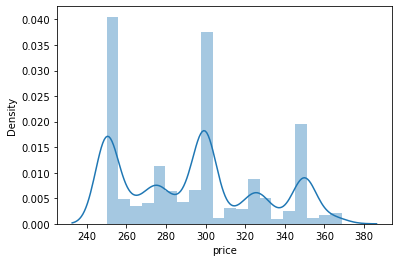

In [161]:
#let's see the distribution of prices in the dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(tax_114_paintings_df_temp['price'])

3) dimensions information (and weight): this is critical for modeling so I must process it and remove those that are missing such info
   item_length, item_width, item_height, dimension_unit, item_weight, weight_unit -> lenght, width, height, area (all in inches), weight (in oz), aspect ratio 

In [162]:
tax_114_paintings_df_temp['item_length'].isna()

0        True
1        True
2       False
3       False
4       False
        ...  
8034     True
8035     True
8036     True
8037     True
8038     True
Name: item_length, Length: 8039, dtype: bool

In [167]:
#I am not sure why the dimensions are missing from the table when if I look at the url it shows the dimensions...
tax_114_paintings_df_temp.iloc[0]['url']

'https://www.etsy.com/listing/1063112878/dahlia-in-bloom-by-micaela-rish-at-the'

In [165]:
tax_114_paintings_df_temp.iloc[0]

listing_id                                                               1063112878
user_id                                                                   232977122
shop_id                                                                    20883278
title                               Dahlia in Bloom by Micaela Rish at The 220 Cafe
description                       ***THIS PAINTING IS NOT AVAILABLE TO BE SHIPPE...
state                                                                        active
creation_timestamp                                                       1630430404
ending_timestamp                                                         1640974804
original_creation_timestamp                                              1630430404
last_modified_timestamp                                                  1630430412
state_timestamp                                                          1630430404
quantity                                                                    

In [174]:
tax_114_paintings_df_temp.iloc[4]['url']

'https://www.etsy.com/listing/967617072/black-boy-cry'

In [175]:
tax_114_paintings_df_temp.iloc[4]

listing_id                                                                967617072
user_id                                                                   451510717
shop_id                                                                    27983768
title                                                                 Black Boy Cry
description                       This work means a great deal to me, I was very...
state                                                                        active
creation_timestamp                                                       1626466263
ending_timestamp                                                         1637097063
original_creation_timestamp                                              1615838641
last_modified_timestamp                                                  1626466263
state_timestamp                                                          1615838641
quantity                                                                    

In [177]:
tax_114_paintings_df_temp['item_dimensions_unit'].unique()

array([nan, 'in', 'mm'], dtype=object)

In [178]:
tax_114_paintings_df_temp['item_weight_unit'].unique()

array([nan, 'oz', 'g'], dtype=object)

In [181]:
#Item dimensions are critical for estimating the price, so I am going to have to drop all the entries that have nan's in either item length or item width or item_dimensions_unit
#I do the same for weight since it's possible that there may be important information there (e.g. if the painting has a frame and is bigger it will weigh more)
tax_114_paintings_df_temp.dropna(axis=0,subset=['item_length','item_width','item_height','item_dimensions_unit','item_weight','item_weight_unit'],inplace=True)

In [190]:
len(tax_114_paintings_df_temp)

3663

In [197]:
#LEt's see an example of entry in which the units are mm
tax_114_paintings_df_temp[tax_114_paintings_df_temp['item_dimensions_unit']=='mm']['item_length']

292     420.0
293     500.0
578     380.0
937     600.0
945     450.0
1291    600.0
1678    380.0
1682    380.0
1762    420.0
3330    400.0
3557    450.0
4675    500.0
4803    380.0
5341    380.0
5435    380.0
6984    500.0
7462    500.0
7584    500.0
Name: item_length, dtype: float64

In [188]:
tax_114_paintings_df_temp.iloc[4][['item_length','item_width','item_dimensions_unit']]

item_length             16.0
item_width              12.0
item_dimensions_unit      in
Name: 11, dtype: object

In [189]:
#Let me process all the dimensions (converting measurement units, etc.) with the following function, that also creates new columns 'area' and 'aspect_ratio' (defined by width/length)
def format_dimensions(length,width,unit):
    if unit=='in':
        area=width*length
        aspect_ratio=width/length
        return length,width,area,aspect_ratio
    elif unit=='mm':
        area=(width/25.4)*(length/25.4)
        aspect_ratio=width/length
        return length/25.4,width/25.4,area,aspect_ratio
        

In [207]:
#need to make sure this gets executed only once, so I drop the column with the units afterwards
tax_114_paintings_df_temp['length']=tax_114_paintings_df_temp[['item_length','item_dimensions_unit']].apply(lambda x:x[0]/25.4 if x[1]=='mm' else x[0], axis=1)
tax_114_paintings_df_temp['width']=tax_114_paintings_df_temp[['item_width','item_dimensions_unit']].apply(lambda x:x[0]/25.4 if x[1]=='mm' else x[0], axis=1)
tax_114_paintings_df_temp['height']=tax_114_paintings_df_temp[['item_height','item_dimensions_unit']].apply(lambda x:x[0]/25.4 if x[1]=='mm' else x[0], axis=1)
tax_114_paintings_df_temp.drop(['item_length','item_width','item_height','item_dimensions_unit'],axis=1,inplace=True)
#this is safer because sometimes people confuse height, length and width
tax_114_paintings_df_temp['area']=tax_114_paintings_df_temp[['width','length','height']].apply(lambda x:(np.max(x)*np.median(x)), axis=1) 
tax_114_paintings_df_temp['aspect_ratio']=tax_114_paintings_df_temp[['width','length','height']].apply(lambda x:(np.max(x)/np.median(x)), axis=1)

In [220]:
#similar processing for the weight
tax_114_paintings_df_temp['item_weight_unit'].unique()

array(['oz', 'g'], dtype=object)

In [223]:
tax_114_paintings_df_temp[tax_114_paintings_df_temp['item_weight_unit']=='g']['item_weight'][:4]

292     300.0
293    1000.0
578      20.0
937    2000.0
Name: item_weight, dtype: float64

In [224]:
tax_114_paintings_df_temp['weight']=tax_114_paintings_df_temp[['item_weight','item_weight_unit']].apply(lambda x:x[0]/28.3495 if x[1]=='g' else x[0], axis=1)
tax_114_paintings_df_temp.drop(['item_weight','item_weight_unit'],axis=1,inplace=True)

,listing_id,user_id,shop_id,title,description,state,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,...,language,price,taxonomy_id,production_partners,length,width,height,area,aspect_ratio,weight
2,639219371,111394905,14990595,The Seed - Original Watercolor Painting,Original Watercolor Painting by @Violineest.\n...,active,1630856446,1641400846,1535293152,1630856446,...,en-US,250.0,114,[],20.0,15.0,0.5,300.0,0.750000,16.0
3,721318596,238069812,21098792,Original Abstract Watercolor Painting: &quot;M...,&quot;Mountain People&quot; is an original wat...,active,1631666443,1642210843,1567986407,1631666443,...,en-US,250.0,114,[],20.0,15.0,1.0,300.0,0.750000,16.0
4,967617072,451510717,27983768,Black Boy Cry,"This work means a great deal to me, I was very...",active,1626466263,1637097063,1615838641,1626466263,...,en-US,250.0,114,[],14.0,11.0,1.0,154.0,0.785714,1.0
10,933203810,236266232,22247027,"Landscape, Beach, Ocean, Sand, Sea Oats, Famil...",Original signed unframed watercolor painting b...,active,1632442857,1642987257,1611277500,1632442857,...,en-US,250.0,114,[],24.0,17.0,4.0,408.0,0.708333,32.0
11,719321818,43427748,20126211,Sixes Bridge Barn - Original Watercolor Painting,Sixes Bridge Barn is an original watercolor pa...,active,1630970439,1641514839,1567290884,1630970439,...,en-US,250.0,114,[],16.0,12.0,5.0,192.0,0.750000,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,953812779,135930190,27570475,Watercolor Iris Original Painting,Pure watercolor painting on Arches watercolor ...,active,1623427394,1633968194,1612124763,1625153897,...,en-US,368.0,114,[],22.0,14.0,22.0,308.0,0.636364,16.0
8015,895128045,7077389,5498657,October Hare,9x12 in Original Watercolor on 300lb cold pres...,active,1625386257,1636013457,1603989747,1625386257,...,en-US,368.0,114,[],13.0,0.5,10.0,6.5,0.038462,16.0
8016,755492044,264548856,22008424,Caligari,Curving stone staircase with flowers growing o...,active,1631792441,1642336841,1578744010,1631792441,...,en-US,368.0,114,[],26.0,21.0,3.0,546.0,0.807692,96.0
8017,1062688690,35021675,8322202,BROOKLYN HEIGHTS | brooklyn promenade urban sk...,Painted on location in July 2021 at the end of...,active,1630360843,1640905243,1630360843,1632247662,...,en-US,368.0,114,[],13.0,10.0,1.0,130.0,0.769231,14.0


In [236]:
tax_114_paintings_df_temp.describe()

,listing_id,user_id,shop_id,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,state_timestamp,quantity,shop_section_id,...,item_width,item_height,price,taxonomy_id,length,width,height,area,aspect_ratio,weight
count,3.663000e+03,3.663000e+03,3.663000e+03,3.663000e+03,3.663000e+03,3.663000e+03,3.663000e+03,3.663000e+03,3663.000000,2.508000e+03,...,3663.000000,3663.000000,3663.000000,3663.0,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,7.961934e+08,1.169181e+08,1.528585e+07,1.628456e+09,1.639026e+09,1.573531e+09,1.629845e+09,1.597549e+09,5.776413,2.397118e+07,...,12.703055,4.608574,292.542722,114.0,19.979231,12.703055,4.608574,322.333093,1.655960,40.705239
std,2.252340e+08,1.278591e+08,7.539342e+06,3.322188e+06,3.322192e+06,6.100866e+07,3.091364e+06,4.019618e+07,54.789164,7.547168e+06,...,6.892231,6.117406,34.044018,0.0,6.449891,6.892231,6.117406,217.869706,1.733439,52.841580
min,1.673803e+07,1.067100e+04,5.003637e+06,1.603866e+09,1.614488e+09,1.225328e+09,1.604030e+09,1.416876e+09,1.000000,5.019832e+06,...,0.010000,0.001000,250.000000,114.0,1.000000,0.010000,0.001000,1.000000,1.000000,0.050000
25%,6.698172e+08,1.800701e+07,7.808942e+06,1.625899e+09,1.636529e+09,1.548224e+09,1.627612e+09,1.583251e+09,1.000000,2.008892e+07,...,9.000000,1.000000,254.500000,114.0,15.000000,9.000000,1.000000,168.000000,1.200000,16.000000
50%,8.373594e+08,6.537741e+07,1.481107e+07,1.628490e+09,1.639034e+09,1.595981e+09,1.630506e+09,1.611812e+09,1.000000,2.487324e+07,...,13.000000,2.000000,300.000000,114.0,20.000000,13.000000,2.000000,285.000000,1.260870,27.000000
75%,9.702888e+08,1.873761e+08,2.160311e+07,1.631309e+09,1.641854e+09,1.615061e+09,1.632612e+09,1.625669e+09,1.000000,3.022785e+07,...,17.000000,5.000000,315.000000,114.0,24.000000,17.000000,5.000000,432.000000,1.363636,48.000000
max,1.097909e+09,5.369443e+08,3.206501e+07,1.633663e+09,1.644293e+09,1.633606e+09,1.633668e+09,1.633630e+09,999.000000,3.563883e+07,...,36.000000,36.000000,369.000000,114.0,60.000000,36.000000,36.000000,1656.000000,36.000000,800.000000


4) Info about when piece was created or added into the system - original_creation_timestamp, when_made

In [254]:
tax_114_paintings_df_temp['when_made'].unique()

array(['2010_2019', '2020_2021', '1990s', nan, 'made_to_order',
       '2002_2009', '1980s', '1950s', 'before_2002', '1960s', '2000_2001',
       '1970s', '1940s', '1920s', '1900s', '1930s', '1800s', '1910s'],
      dtype=object)

In [248]:
grouped_by_made_period = tax_114_paintings_df_temp.groupby(by='when_made')

In [255]:
grouped_by_made_period['listing_id'].count()

when_made
1800s              25
1900s              11
1910s               5
1920s              21
1930s              16
1940s              32
1950s              38
1960s              66
1970s              84
1980s             100
1990s              60
2000_2001          11
2002_2009          61
2010_2019        1276
2020_2021        1305
before_2002       106
made_to_order     344
Name: listing_id, dtype: int64

In [256]:
#it looks like the overwhelming majority of paintings is either done in the past 1-2 years or in the previous decade (2010-2019) so this variable may not be that informative.
#I can perhaps use this as categorical data with 4 categories like ['made_to_order','made_2020s','made_2010s','made_before_2010']
#First, let's check how many entries are missing the 'when made' tag to make sure we are not dropping too many cells if we decide to use this

In [265]:
sum(tax_114_paintings_df_temp['when_made'].isna())

102

In [266]:
#Drop the rows without 'when_made'
tax_114_paintings_df_temp.dropna(axis=0,subset=['when_made'],inplace=True)

In [267]:
def format_when_made(when_made):
    if when_made=='made_to_order':
        return 'made_to_order'
    elif when_made=='2020_2021':
        return 'made_2020s'
    elif when_made=='2010_2019':
        return 'made_2010s'
    else:
        return 'made_before_2010'

In [272]:
#tax_114_paintings_df_temp['when_made']=tax_114_paintings_df_temp['when_made'].apply(lambda x:format_when_made(x), axis=1)
tax_114_paintings_df_temp['when_made']=tax_114_paintings_df_temp['when_made'].apply(lambda x:format_when_made(x)) #, axis=1)

In [273]:
tax_114_paintings_df_temp.iloc[38]

listing_id                                                                878930875
user_id                                                                    34247292
shop_id                                                                    24955763
title                                            Not In A Row - original watercolor
description                       Five ducklings follow closely after their moth...
state                                                                        active
creation_timestamp                                                       1633123280
ending_timestamp                                                         1643754080
original_creation_timestamp                                              1601412878
last_modified_timestamp                                                  1633123280
state_timestamp                                                          1625948444
quantity                                                                    

In [ ]:
#Next let's look at the age of a listing (which may or may not related to when the painting was actually created) and when it was last updated

In [280]:
from datetime import datetime
#let's use end of the year as the reference day to which comparing every other date
ref_date = datetime.strptime('2021-Dec-31','%Y-%b-%d') 
ref_date

datetime.datetime(2021, 12, 31, 0, 0)

In [289]:
tax_114_paintings_df_temp['days_from_original_creation'] = tax_114_paintings_df_temp['original_creation_timestamp'].apply(lambda x:(datetime.strptime('2021-Dec-31','%Y-%b-%d')-datetime.fromtimestamp(x)).days) #, axis=1)

In [291]:
tax_114_paintings_df_temp['days_from_last_modification'] = tax_114_paintings_df_temp['last_modified_timestamp'].apply(lambda x:(datetime.strptime('2021-Dec-31','%Y-%b-%d')-datetime.fromtimestamp(x)).days) #, axis=1)

In [292]:
tax_114_paintings_df_temp.describe()

,listing_id,user_id,shop_id,creation_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,state_timestamp,quantity,shop_section_id,...,taxonomy_id,length,width,height,area,aspect_ratio,weight,dayd_from_original_creation,days_from_original_creation,days_from_last_modification
count,3.561000e+03,3.561000e+03,3.561000e+03,3.561000e+03,3.561000e+03,3.561000e+03,3.561000e+03,3.561000e+03,3561.000000,2.439000e+03,...,3561.0,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000
mean,8.029563e+08,1.186991e+08,1.540537e+07,1.628427e+09,1.638997e+09,1.575279e+09,1.629851e+09,1.598264e+09,5.632687,2.409885e+07,...,114.0,19.936232,12.678542,4.618831,320.970266,1.658343,40.581520,759.408874,759.408874,127.747262
std,2.212525e+08,1.284614e+08,7.547512e+06,3.328807e+06,3.328778e+06,5.966518e+07,3.097412e+06,4.012898e+07,53.010285,7.514113e+06,...,0.0,6.426492,6.881785,6.117891,215.707134,1.749726,53.160926,690.570665,690.570665,35.850409
min,1.673803e+07,1.067100e+04,5.003637e+06,1.603866e+09,1.614488e+09,1.225328e+09,1.604030e+09,1.416876e+09,1.000000,5.019832e+06,...,114.0,1.000000,0.010000,0.001000,1.000000,1.000000,0.050000,84.000000,84.000000,83.000000
25%,6.785025e+08,1.901227e+07,8.071053e+06,1.625861e+09,1.636492e+09,1.550165e+09,1.627608e+09,1.585064e+09,1.000000,2.023816e+07,...,114.0,15.000000,9.000000,1.000000,168.000000,1.200000,16.000000,290.000000,290.000000,96.000000
50%,8.460906e+08,6.739041e+07,1.488269e+07,1.628461e+09,1.639005e+09,1.597368e+09,1.630520e+09,1.612663e+09,1.000000,2.488025e+07,...,114.0,20.000000,13.000000,2.000000,285.000000,1.258065,24.000000,504.000000,504.000000,120.000000
75%,9.736796e+08,1.906965e+08,2.174422e+07,1.631236e+09,1.641781e+09,1.615839e+09,1.632623e+09,1.625948e+09,1.000000,3.024442e+07,...,114.0,24.000000,17.000000,5.000000,432.000000,1.357143,48.000000,1050.000000,1050.000000,154.000000
max,1.097909e+09,5.369443e+08,3.206501e+07,1.633663e+09,1.644293e+09,1.633606e+09,1.633668e+09,1.633630e+09,999.000000,3.563883e+07,...,114.0,60.000000,36.000000,36.000000,1656.000000,36.000000,800.000000,4810.000000,4810.000000,426.000000


In [295]:
#I can now drop all the other timestamp variables
tax_114_paintings_df_temp.drop(['creation_timestamp','ending_timestamp','original_creation_timestamp','last_modified_timestamp','state_timestamp'],axis=1,inplace=True)

In [296]:
tax_114_paintings_df_temp.describe()

,listing_id,user_id,shop_id,quantity,shop_section_id,featured_rank,num_favorers,personalization_char_count_max,listing_type,shipping_profile_id,...,price,taxonomy_id,length,width,height,area,aspect_ratio,weight,days_from_original_creation,days_from_last_modification
count,3.561000e+03,3.561000e+03,3.561000e+03,3561.000000,2.439000e+03,3561.000000,3561.000000,130.000000,3561.000000,2.662000e+03,...,3561.000000,3561.0,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000
mean,8.029563e+08,1.186991e+08,1.540537e+07,5.632687,2.409885e+07,0.607133,6.862398,248.630769,0.000562,7.890563e+10,...,292.269309,114.0,19.936232,12.678542,4.618831,320.970266,1.658343,40.581520,759.408874,127.747262
std,2.212525e+08,1.284614e+08,7.547512e+06,53.010285,7.514113e+06,13.896501,30.639296,91.962593,0.023696,4.240403e+10,...,33.940419,0.0,6.426492,6.881785,6.117891,215.707134,1.749726,53.160926,690.570665,35.850409
min,1.673803e+07,1.067100e+04,5.003637e+06,1.000000,5.019832e+06,-1.000000,0.000000,20.000000,0.000000,2.235123e+06,...,250.000000,114.0,1.000000,0.010000,0.001000,1.000000,1.000000,0.050000,84.000000,83.000000
25%,6.785025e+08,1.901227e+07,8.071053e+06,1.000000,2.023816e+07,-1.000000,0.000000,256.000000,0.000000,4.434544e+10,...,251.000000,114.0,15.000000,9.000000,1.000000,168.000000,1.200000,16.000000,290.000000,96.000000
50%,8.460906e+08,6.739041e+07,1.488269e+07,1.000000,2.488025e+07,-1.000000,2.000000,256.000000,0.000000,7.831476e+10,...,300.000000,114.0,20.000000,13.000000,2.000000,285.000000,1.258065,24.000000,504.000000,120.000000
75%,9.736796e+08,1.906965e+08,2.174422e+07,1.000000,3.024442e+07,-1.000000,5.000000,256.000000,0.000000,1.125533e+11,...,312.000000,114.0,24.000000,17.000000,5.000000,432.000000,1.357143,48.000000,1050.000000,154.000000
max,1.097909e+09,5.369443e+08,3.206501e+07,999.000000,3.563883e+07,325.000000,807.000000,1000.000000,1.000000,1.544984e+11,...,369.000000,114.0,60.000000,36.000000,36.000000,1656.000000,36.000000,800.000000,4810.000000,426.000000


5) Rankings given by either the seller or users: 'featured_rank', 'num_favorers'

In [299]:
#How many paintings have favorers
tax_114_paintings_df_temp['num_favorers'].unique()

array([  1,   2,   0,   3,   6,   4,  92,   9,  21,  10,   8, 116,   5,
        26,  20,   7,  16,  13,  19,  17,  32,  12,  28,  14,  60,  18,
        49,  23, 130,  11,  48,  37,  33,  31,  15,  27,  30,  29,  22,
       220,  45,  53,  40,  51,  79,  62,  24,  81, 127,  46,  86, 286,
        39,  52,  66,  67, 102,  36, 203,  58,  56, 299,  47,  35,  25,
        72, 119,  76,  38, 136,  34,  94,  50, 149,  43,  69,  97, 115,
       362, 327,  59, 541, 145, 118, 566, 351, 502, 147,  73, 191, 121,
       578,  74, 100,  57, 322,  55, 520, 807, 101], dtype=int64)

In [300]:
#many paintings have non-zero number of favorers, so this may be a useful attribute
len(tax_114_paintings_df_temp[tax_114_paintings_df_temp['num_favorers']>0])

2411

In [301]:
#However, is it missing in many paintings? No
sum(tax_114_paintings_df_temp['num_favorers'].isna())

0

In [302]:
#Let's check featured_rank:
tax_114_paintings_df_temp['featured_rank'].unique()

array([ -1,   3,   2,  13,  10,   0,  22,   6,   9,  34,  17,  12, 150,
         4,  14,   1,   5, 105,   7, 106, 170,  97, 135,   8,  27, 250,
       165,  87,  69, 325, 276,  11,  43,  55,  23,  24,  39,  38, 103,
        40,  56,  31,  25,  30,  35,  15, 142,  65,  41,  42,  16,  37,
        28,  32,  95, 172, 155, 116, 167, 168,  19, 228, 169, 117],
      dtype=int64)

In [303]:
#many paintings have featured_rank different from default -1? Not very many, but it may be important and it is not missing in any entry, so I will leave this alone
len(tax_114_paintings_df_temp[tax_114_paintings_df_temp['featured_rank']!=-1])

295

In [305]:
sum(tax_114_paintings_df_temp['featured_rank'].isna())

0

6) A bunch of misc variable that may or may not matter, most of whilch I'll remove except the first few

In [323]:
#Who made the painting? Seller or somebody else?
tax_114_paintings_df_temp['who_made'].value_counts()

i_did           2946
someone_else     521
collective        94
Name: who_made, dtype: int64

In [324]:
#Let's redefine the above as a boolean: seller made TRUE or FALSE (if someone_else or collective made it)
tax_114_paintings_df_temp['made_by_seller']=tax_114_paintings_df_temp['who_made'].apply(lambda x:True if 'i_did' else False) #, axis=1)

In [325]:
#Drop the original column
tax_114_paintings_df_temp.drop(['who_made'],axis=1,inplace=True)

In [321]:
#Quantity - most of the paintings have only quantity 1, and the other numbers vary a lot, so I will remove this 
tax_114_paintings_df_temp['quantity'].unique()

array([  1,   4,  75,   2,   5,   3,  74,  18,  20,   8,  12,  99,  10,
       100,  34, 999,  16,  17, 500, 200,  98,  48,   6, 997, 998, 996,
        97,  19,  15, 979, 199,  14,  60,   9,  59,  30,  91, 397,  90,
         7,  22,  29,  50,  25,  11], dtype=int64)

In [322]:
len(tax_114_paintings_df_temp[tax_114_paintings_df_temp['quantity']>1])

234

In [307]:
sum(tax_114_paintings_df_temp['quantity'].isna())

0

In [309]:
#Listing type - this is almost exclusively equal 0, so I will drop this
tax_114_paintings_df_temp['listing_type'].unique()

array([0, 1], dtype=int64)

In [311]:
len(tax_114_paintings_df_temp[tax_114_paintings_df_temp['listing_type']==1])

2

In [313]:
#Non-taxable - very few entries are true, so I will drop this
tax_114_paintings_df_temp['non_taxable'].value_counts()

False    3492
True       69
Name: non_taxable, dtype: int64

In [314]:
#Is personalizable - very few entries are true, so I will drop this
tax_114_paintings_df_temp['is_personalizable'].value_counts()

False    3437
True      124
Name: is_personalizable, dtype: int64

In [318]:
#personalization_is_required - very few entries are true, so I will drop this (along with the other 'personalization' info)
tax_114_paintings_df_temp['personalization_is_required'].value_counts()

False    3487
True       74
Name: personalization_is_required, dtype: int64

In [319]:
#is_supply - very few entries are true, so I will drop this (along with the other )
tax_114_paintings_df_temp['is_supply'].value_counts()

False    3552
True        9
Name: is_supply, dtype: int64

In [320]:
#is_private - no entries are true, so I will drop this (along with the other )
tax_114_paintings_df_temp['is_private'].value_counts()

False    3561
Name: is_private, dtype: int64

In [333]:
#is_customizable - >500 entries are true, so I will leave this alone
tax_114_paintings_df_temp['is_customizable'].value_counts()

False    2997
True      564
Name: is_customizable, dtype: int64

In [334]:
 #has_variations - ~350 entries are true, so I will leave this alone
tax_114_paintings_df_temp['has_variations'].value_counts()

False    3212
True      349
Name: has_variations, dtype: int64

In [327]:
#Here is where I drop at once the columns discussed above:
tax_114_paintings_df_temp.drop(['quantity','listing_type','non_taxable','is_personalizable','personalization_is_required','is_supply','is_private'],axis=1,inplace=True)

In [ ]:
#Also drop a bunch of other things that don't matter:

In [328]:
tax_114_paintings_df_temp.drop(['state','personalization_char_count_max','personalization_instructions','processing_min','processing_max','should_auto_renew','language','production_partners','file_data'],axis=1,inplace=True)

In [331]:
tax_114_paintings_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 2 to 8024
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   3561 non-null   int64  
 1   user_id                      3561 non-null   int64  
 2   shop_id                      3561 non-null   int64  
 3   title                        3561 non-null   object 
 4   description                  3561 non-null   object 
 5   shop_section_id              2439 non-null   float64
 6   featured_rank                3561 non-null   int64  
 7   url                          3561 non-null   object 
 8   num_favorers                 3561 non-null   int64  
 9   is_customizable              3561 non-null   bool   
 10  tags                         3561 non-null   object 
 11  materials                    3561 non-null   object 
 12  shipping_profile_id          2662 non-null   float64
 13  when_made         

7) Look at 'tags', 'materials' and 'style', word tags that are added in some of the paintings

In [337]:
#The 'materials' don't seem to add a lot of information (mostly watercolors, paper, etc.) that is not already implied by taxonomy number 
#and on the contrary there may be problems due to different spellings - 
#for now I will keep this column but not use it 
tax_114_paintings_df_temp['materials'].value_counts()[:20]

['Paper']                                                                            1299
[]                                                                                    794
['watercolor', 'paper']                                                               166
['watercolor']                                                                         36
['Stretched canvas']                                                                   36
['Watercolor']                                                                         31
['Winsor and Newton Professional Watercolor', 'Watercolor paper']                      24
['acid free paper', 'watercolor paint']                                                22
['ink', 'watercolor', 'pigment', 'gouache']                                            22
['paper', 'watercolor']                                                                20
['Cardboard']                                                                          18
['watercol

In [338]:
#The style tags are added only in a very limited number of cases, so they are unlikely to be helpful - I leave them alone but not use them
tax_114_paintings_df_temp['style'].value_counts()[:20]

[]                                 3339
['Modern']                           19
['Southwestern']                     14
['Abstract', 'Modern']               13
['Southwestern', 'Woodland']         13
['Hippie', 'Boho']                   12
['Traditional', 'Traditional']       12
['Beach']                             9
['Traditional']                       9
['Southwestern', 'Abstract']          7
['Southwestern', 'Historical']        6
['Traditional', 'Modern']             6
['Abstract']                          4
['Modern', 'Traditional']             4
['Rustic']                            3
['Woodland', 'Southwestern']          3
['Asian', 'Modern']                   2
['personalized', 'Sentimental']       2
['Modern', 'Mod']                     2
['Traditional', 'Cottage Chic']       2
Name: style, dtype: int64

In [339]:
#The generic 'tags' may (or may not) add valuable info but are messy - for now I'll leave them alone -  but I may try to do something smart with this later in machine-learning
tax_114_paintings_df_temp['tags'].value_counts()[:20]

[]                                                                                                                                                                                                                                                               421
['original art', 'original', 'art', 'watercolor', 'colorful', 'jillkrutickfineart', 'jill krutick', 'vibrant', 'abstract', 'contemporary', 'underwater', 'nautical', 'tie dye']                                                                                   16
['Art', 'LeakyPenProductions', 'Hal Moore', 'memorabilia', 'Original art']                                                                                                                                                                                        15
['crest', 'watercolor', 'heraldry', 'monogram', 'wedding crest', 'wedding monogram', 'custom crest', 'painted crest', 'custom wedding crest', 'monogram crest', 'monogram heraldry']                                     

8) Finally I will take care of taxonomy in the way discussed earlier, leaving only 4 types: 'Oil', 'Watercolor', 'Acrylic' and 'More than one' 

In [340]:
#but less than 1000 for all the other taxonomies. Hence I will drop all these other minor taxonomies, combine 107 and 111 in a new 'More than one' category and will at the end
#have 4 categories: acrylic, oil, watercolor, more_than_one

In [341]:
tax_114_paintings_df_temp['taxonomy_id'].value_counts()

114    3561
Name: taxonomy_id, dtype: int64

In [342]:
def format_taxonomy_id(taxonomy_id):
    if taxonomy_id==106:
        return 'acrylic'
    elif taxonomy_id==112:
        return 'oil'
    elif taxonomy_id==114:
        return 'watercolor'
    elif taxonomy_id in [107,111]:
        return 'more_than_one'
    else:
        return 'other'

In [343]:
tax_114_paintings_df_temp['painting_type']=tax_114_paintings_df_temp['taxonomy_id'].apply(lambda x:format_taxonomy_id(x)) #, axis=1)

In [351]:
tax_114_paintings_df_temp['painting_type'].value_counts()

watercolor    3561
Name: painting_type, dtype: int64

In [347]:
#So at the end of this cleaning procedure, the first set of ~8000 watercolor paintings (with 45 fields pf information) got reduced to 
#~3561 paintings with ~25 fields of information plus the price target column

In [348]:
len(tax_114_paintings_df_temp)

3561

In [354]:
#Of the remaining 26 fields of information, 7 are just useful to identify the artifact (the _id's and url), 
# 5 are textual descriptions/tags that are unlikely to be very helpful (title, description, tags, materials, style),
# 10 are numerical features that will be used in the predictor: featured_rank, num_favorers, length, width, height, area, aspect_ratio, weight, days_from_original_creation, days_from_last_modifications
# 2 are categorical features that will be used in the predictor: painting_type (4 categories), when_made (4 categories)
# 3 are boolean features: is_customizable, has_variations, made_by_seller

In [353]:
tax_114_paintings_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 2 to 8024
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   3561 non-null   int64  
 1   user_id                      3561 non-null   int64  
 2   shop_id                      3561 non-null   int64  
 3   title                        3561 non-null   object 
 4   description                  3561 non-null   object 
 5   shop_section_id              2439 non-null   float64
 6   featured_rank                3561 non-null   int64  
 7   url                          3561 non-null   object 
 8   num_favorers                 3561 non-null   int64  
 9   is_customizable              3561 non-null   bool   
 10  tags                         3561 non-null   object 
 11  materials                    3561 non-null   object 
 12  shipping_profile_id          2662 non-null   float64
 13  when_made         

### Encapsulate all the preprocessing steps into a single function to be applied to each .csv file of raw data

In [773]:
from datetime import datetime

def format_dimensions(dimension_unit_vec):
    if dimension_unit_vec[1]=='in':
        return dimension_unit_vec[0]
    elif dimension_unit_vec[1]=='mm':
        return dimension_unit_vec[0]/25.4
    elif dimension_unit_vec[1]=='cm':
        return dimension_unit_vec[0]/25.4
    else:
        print(f'measurement unit {dimension_unit_vec[1]} not supported for dimensions')

def format_weight(weight_unit_vec):
    if weight_unit_vec[1]=='oz':
        return weight_unit_vec[0]
    elif weight_unit_vec[1]=='g':
        return weight_unit_vec[0]/28.3495
    else:
        print(f'measurement unit {weight_unit_vec[1]} not supported for weight')
        
def format_when_made(when_made):
    if when_made=='made_to_order':
        return 'made_to_order'
    elif when_made=='2020_2021':
        return 'made_2020s'
    elif when_made=='2010_2019':
        return 'made_2010s'
    else:
        return 'made_before_2010'
    
def format_taxonomy_id(taxonomy_id):
    if taxonomy_id==106:
        return 'acrylic'
    elif taxonomy_id==112:
        return 'oil'
    elif taxonomy_id==114:
        return 'watercolor'
    elif taxonomy_id in [107,111]:
        return 'more_than_one'
    else:
        return 'other'

def clean_listings_dataframe(paintings_orig_df_by_taxonomy):

    #This function will drop the paintings without dimensions info and 'when_made' information.
    #Then for all remaining entries the info is consolidated into 27 fields of information in addition to the target column 'price':
    # 7 fields are just useful to identify the artifact (the _id's and url), 
    # 5 are textual descriptions/tags that are unlikely to be very helpful (title, description, tags, materials, style),
    # 10 are numerical features that will be used in the predictor: featured_rank, num_favorers, length, width, height, area, aspect_ratio, weight, days_from_original_creation, days_from_last_modifications
    # 2 are categorical features that will be used in the predictor: painting_type (4 categories), when_made (4 categories)
    # 3 are boolean features: is_customizable, has_variations, made_by_seller

    #1) Item dimensions are critical for estimating the price, so I am going to have to drop all the entries that have nan's in either item length or item width or item_dimensions_unit
    #I do the same for weight since it's possible that there may be important information there (e.g. if the painting has a frame and is bigger it will weigh more)
    paintings_orig_df_by_taxonomy.dropna(axis=0,subset=['item_length','item_width','item_height','item_dimensions_unit','item_weight','item_weight_unit'],inplace=True)

    #2) process all the dimensions (converting measurement units, etc.) as follows, also creating new columns 'area' and 'aspect_ratio' (defined by max dim/2nd dimension)
    #need to make sure this gets executed only once, so I drop the column with the units afterwards
    paintings_orig_df_by_taxonomy['length']=paintings_orig_df_by_taxonomy[['item_length','item_dimensions_unit']].apply(lambda x:format_dimensions(x), axis=1)
    paintings_orig_df_by_taxonomy['width']=paintings_orig_df_by_taxonomy[['item_width','item_dimensions_unit']].apply(lambda x:format_dimensions(x), axis=1)
    paintings_orig_df_by_taxonomy['height']=paintings_orig_df_by_taxonomy[['item_height','item_dimensions_unit']].apply(lambda x:format_dimensions(x), axis=1)
    paintings_orig_df_by_taxonomy.drop(['item_length','item_width','item_height','item_dimensions_unit'],axis=1,inplace=True)
    #this is safer because sometimes people confuse height, length and width
    paintings_orig_df_by_taxonomy['max_dimension']=paintings_orig_df_by_taxonomy[['width','length','height']].apply(lambda x:np.max(x), axis=1) 
    paintings_orig_df_by_taxonomy['area']=paintings_orig_df_by_taxonomy[['width','length','height']].apply(lambda x:(np.max(x)*np.median(x)), axis=1) 
    paintings_orig_df_by_taxonomy['aspect_ratio']=paintings_orig_df_by_taxonomy[['width','length','height']].apply(lambda x:(np.max(x)/np.median(x)), axis=1)

    #3) process the weight also, by consolidating units and renaming the column 
    paintings_orig_df_by_taxonomy['weight']=paintings_orig_df_by_taxonomy[['item_weight','item_weight_unit']].apply(lambda x:format_weight(x), axis=1)
    paintings_orig_df_by_taxonomy.drop(['item_weight','item_weight_unit'],axis=1,inplace=True)

    #4) The overwhelming majority of paintings is either done in the past 1-2 years or in the previous decade (2010-2019).
    #Create categorical feature with 4 categories like ['made_to_order','made_2020s','made_2010s','made_before_2010'] using the original 'when_made' column
    #Drop the rows without 'when_made'
    paintings_orig_df_by_taxonomy.dropna(axis=0,subset=['when_made'],inplace=True)   
    paintings_orig_df_by_taxonomy['when_made']=paintings_orig_df_by_taxonomy['when_made'].apply(lambda x:format_when_made(x)) #, axis=1)

    #5) Convert timestamps for original creation and last modification into number of days from the end of 2021
    ref_date = datetime.strptime('2021-Dec-31','%Y-%b-%d') 
    paintings_orig_df_by_taxonomy['days_from_original_creation'] = paintings_orig_df_by_taxonomy['original_creation_timestamp'].apply(lambda x:(datetime.strptime('2021-Dec-31','%Y-%b-%d')-datetime.fromtimestamp(x)).days) #, axis=1)
    paintings_orig_df_by_taxonomy['days_from_last_modification'] = paintings_orig_df_by_taxonomy['last_modified_timestamp'].apply(lambda x:(datetime.strptime('2021-Dec-31','%Y-%b-%d')-datetime.fromtimestamp(x)).days) #, axis=1)

    #6) Drop all the other timestamp variables
    paintings_orig_df_by_taxonomy.drop(['creation_timestamp','ending_timestamp','original_creation_timestamp','last_modified_timestamp','state_timestamp'],axis=1,inplace=True)

    #7) Fill the missing values for 'num_favorers' and 'featured_rank' (if any) with the default values 0 and -1 respectively, and the 'who_made' missing values with 'i_did',
    #since these are the overwhelmingly must common cases
    paintings_orig_df_by_taxonomy['num_favorers'].fillna(value=0,inplace=True)
    paintings_orig_df_by_taxonomy['featured_rank'].fillna(value=-1,inplace=True)
    paintings_orig_df_by_taxonomy['who_made'].fillna(value='i_did',inplace=True)
    
    #8) Redefine the 'who_made' variable as a boolean: seller made TRUE or FALSE (if someone_else or collective made it)
    paintings_orig_df_by_taxonomy['made_by_seller']=paintings_orig_df_by_taxonomy['who_made'].apply(lambda x:True if x=='i_did' else False) #, axis=1)
    #Drop the original column
    paintings_orig_df_by_taxonomy.drop(['who_made'],axis=1,inplace=True)

    #9) Drop a bunch of columns that are standard for the great majority of the paintings
    paintings_orig_df_by_taxonomy.drop(['quantity','listing_type','non_taxable','is_personalizable','personalization_is_required','is_supply','is_private'],axis=1,inplace=True)

    #10) Drop a bunch of other info that doesn't matter for the model:
    paintings_orig_df_by_taxonomy.drop(['state','personalization_char_count_max','personalization_instructions','processing_min','processing_max','should_auto_renew','language','production_partners','file_data'],axis=1,inplace=True)

    #11) Create a new 'painting_type' categorical value from 'taxonomy_id' with only 4 categories: acrylic, oil, watercolor, more_than_one
    #(I keep the 'taxonomy_id' column also as an identifier of the item like listing_id, user_id, shop_id, etc.)   
    paintings_orig_df_by_taxonomy['painting_type']=paintings_orig_df_by_taxonomy['taxonomy_id'].apply(lambda x:format_taxonomy_id(x)) #, axis=1)

    #Note: I am leaving alone the 'free text' columns such as 'title', 'description', 'tags', 'materials' and 'style' for possible future use




In [372]:
#Test the previous procedure on the second subset of watercolor paintings to make sure it works as expected:

taxonomy_id = 114

csv_filename_pattern = f'./Git_exclude/Data/tax{taxonomy_id}_all_paintings*.csv'
tax_csv_files = glob.glob(csv_filename_pattern)
tax_114_paintings_df_temp_2 = pd.read_csv(tax_csv_files[1])

In [373]:
len(tax_114_paintings_df_temp_2)

5175

In [374]:
tax_114_paintings_df_temp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      5175 non-null   int64  
 1   user_id                         5175 non-null   int64  
 2   shop_id                         5175 non-null   int64  
 3   title                           5175 non-null   object 
 4   description                     5175 non-null   object 
 5   state                           5175 non-null   object 
 6   creation_timestamp              5175 non-null   int64  
 7   ending_timestamp                5175 non-null   int64  
 8   original_creation_timestamp     5175 non-null   int64  
 9   last_modified_timestamp         5175 non-null   int64  
 10  state_timestamp                 5175 non-null   int64  
 11  quantity                        5175 non-null   int64  
 12  shop_section_id                 38

In [375]:
clean_listings_dataframe(tax_114_paintings_df_temp_2)

In [376]:
len(tax_114_paintings_df_temp_2)

2200

In [377]:
tax_114_paintings_df_temp_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 5173
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   2200 non-null   int64  
 1   user_id                      2200 non-null   int64  
 2   shop_id                      2200 non-null   int64  
 3   title                        2200 non-null   object 
 4   description                  2200 non-null   object 
 5   shop_section_id              1528 non-null   float64
 6   featured_rank                2200 non-null   int64  
 7   url                          2200 non-null   object 
 8   num_favorers                 2200 non-null   int64  
 9   is_customizable              2200 non-null   bool   
 10  tags                         2200 non-null   object 
 11  materials                    2200 non-null   object 
 12  shipping_profile_id          1518 non-null   float64
 13  when_made         

In [ ]:
#So at the end of this cleaning procedure, the second set of ~5000 watercolor paintings (with 45 fields pf information) got reduced to 
#2200 paintings with ~25 fields of information plus the price target column

### Here is the iteration applying the cleaning procedure to all paintings of all taxonomies of interest, and creating a unique dataframe to carry forward for machine learning

In [774]:
import glob

#I will drop all the minor taxonomies that have less than 1000 paintings each, combine 107 (Combination) and 111 (Mixed) in a new 'More than one' category and will at the end
#have 4 categories with the main taxonomies (106=acrylic, 112=oil, 114=watercolor) + 'more_than_one'

min_price = 250.0

csv_combined_filename = f'./Git_exclude/Data/all_paintings_from_USD{int(min_price)}_cleaned_listings.csv'
    
#If the file with all the cleaned listing data already exists, I load it, otherwise I create it with the cleaning steps chosen above
try:
    all_paintings_df = pd.read_csv(csv_combined_filename)

    print(f'Loaded listings file {csv_combined_filename} with all the cleaned listings (multiple taxonomies).')

except:
    
    try: #it by any chance there is a version of 'all_paintings_df' around, I delete it
        del all_paintings_df
    except NameError:
        pass

    taxonomies_of_interest = [106, 107, 111, 112, 114]

    for taxonomy_id in taxonomies_of_interest:

        csv_filename_pattern_tax_id = f'./Git_exclude/Data/tax{taxonomy_id}_all_paintings*.csv'
        tax_id_csv_files = glob.glob(csv_filename_pattern_tax_id)

        for csv_file in tax_id_csv_files:

            tax_id_paintings_df_temp = pd.read_csv(csv_file)

            clean_listings_dataframe(tax_id_paintings_df_temp)

            try: #concatenate to the other
                all_paintings_df = pd.concat([all_paintings_df, tax_id_paintings_df_temp])
            except: #if it's the first iteration, I need to create the dataframe where the data of all paintings of all taxonomies will be stored
                all_paintings_df = tax_id_paintings_df_temp

    #because of the imbalance in prices (watercolors only had paintings up to 672$, oil up to 700$, acrylic up to 750$ and 'more_than_one' up to 662$), 
    #I only keep paintings with price <= 650$
    all_paintings_df = all_paintings_df[all_paintings_df['price']<=650.0]
    
    #drop all paintings with largest dimension >72in, as those are outliers
    all_paintings_df = all_paintings_df[all_paintings_df['max_dimension']<=72.0]

    #sort by price in ascending order, with listing_id used next to break ties - this should shuffle the 4 painting types
    all_paintings_df.sort_values(by=['price','listing_id'], ascending=True, inplace=True)

    #reset index (dropping old ones that are meaningless)
    all_paintings_df.reset_index(drop=True, inplace=True)
    
    #finally save to .csv file for further processing (machine learning model, etc.) and avoiding to recompute everything late
    all_paintings_df.to_csv(csv_combined_filename,index=False)
    print(f'Saved listings file {csv_combined_filename} with all the cleaned listings (multiple taxonomies).')
    
    

Saved listings file ./Git_exclude/Data/all_paintings_from_USD250_cleaned_listings.csv with all the cleaned listings (multiple taxonomies).


In [775]:
len(all_paintings_df)

45848

In [776]:
#Let's check I have everything as expected
all_paintings_df['taxonomy_id'].value_counts()

106    19635
112    17473
114     5752
111     1848
107     1140
Name: taxonomy_id, dtype: int64

In [777]:
all_paintings_df['painting_type'].value_counts()

acrylic          19635
oil              17473
watercolor        5752
more_than_one     2988
Name: painting_type, dtype: int64

C:\Users\matte\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

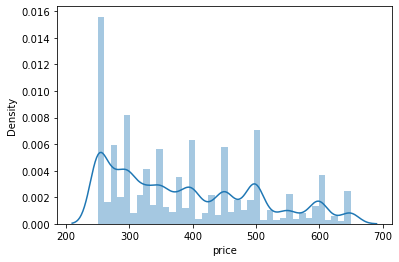

In [778]:
#Let's check the range of prices I have, especially for each painting type
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(all_paintings_df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

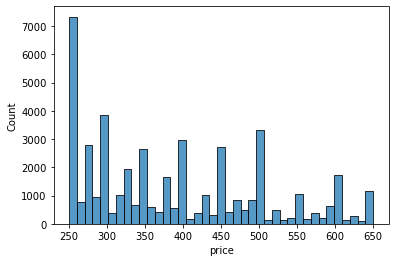

In [779]:
sns.histplot(all_paintings_df['price'])

<AxesSubplot:xlabel='price', ylabel='painting_type'>

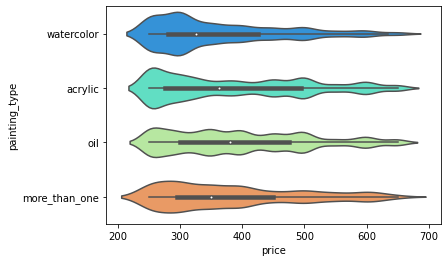

In [780]:
#Let's plot by painting type 
sns.violinplot(x="price", y="painting_type", data=all_paintings_df,palette='rainbow')

In [781]:
all_paintings_df.groupby(by='painting_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
painting_type,,,,,,,,
acrylic,19635.0,388.141653,120.811372,250.0,275.0,362.0,495.0,650.0
more_than_one,2988.0,384.157848,111.782780,250.0,295.0,350.0,450.0,650.0
oil,17473.0,396.342334,111.317943,250.0,299.0,380.0,475.0,650.0
watercolor,5752.0,361.525421,103.776414,250.0,280.0,325.0,425.0,650.0


In [782]:
all_paintings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45848 entries, 0 to 45847
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   45848 non-null  int64  
 1   user_id                      45848 non-null  int64  
 2   shop_id                      45848 non-null  int64  
 3   title                        45848 non-null  object 
 4   description                  45848 non-null  object 
 5   shop_section_id              27170 non-null  float64
 6   featured_rank                45848 non-null  int64  
 7   url                          45848 non-null  object 
 8   num_favorers                 45848 non-null  int64  
 9   is_customizable              45848 non-null  bool   
 10  tags                         45848 non-null  object 
 11  materials                    45848 non-null  object 
 12  shipping_profile_id          30880 non-null  float64
 13  when_made       

In [783]:
all_paintings_df.head()

,listing_id,user_id,shop_id,title,description,shop_section_id,featured_rank,url,num_favorers,is_customizable,...,width,height,max_dimension,area,aspect_ratio,weight,days_from_original_creation,days_from_last_modification,made_by_seller,painting_type
0,28584215,7788342,5612716,Nuala - Original Watercolor (Framed),"This is an original watercolor, titled &quot;Nuala&quot; 2009\r\n\r\n(The unframed picture shows...",6306700.0,-1,https://www.etsy.com/listing/28584215/nuala-original-watercolor-framed,10,False,...,26.0,8.0,30.0,780.0,1.153846,240.0,4536,168,True,watercolor
1,40722367,9264578,5800355,US Mail Plane,This is a painting of one of my favorites from my collection of WWII toys. This was my uncle&#3...,6798937.0,-1,https://www.etsy.com/listing/40722367/us-mail-plane,55,False,...,30.0,4.0,30.0,900.0,1.000000,96.0,4337,134,True,acrylic
2,47095684,9977031,5889085,Garden Window - original watercolor painting,Spring time in Santa Fe with a sunny window looking onto the garden. Classic Santa Fe adobe wal...,7409641.0,34,https://www.etsy.com/listing/47095684/garden-window-original-watercolor,32,True,...,16.0,1.0,20.0,320.0,1.250000,32.0,4247,90,True,watercolor
3,52229780,5976773,5315957,In the Landscape of the Divine Madness -- A Treatise on Shapeshifting,"I like this one because it came straight from my head, superimposed on a class exercise to paint...",6919244.0,-1,https://www.etsy.com/listing/52229780/in-the-landscape-of-the-divine-madness-a,5,True,...,16.0,3.0,19.0,304.0,1.187500,48.0,4177,95,True,oil
4,55639432,9977031,5889085,Kanazawa Side Street - Original Watercolor Painting,"Pedestrian street in Kanazawa, Japan.\n\n12&quot; x 18&quot; image size, 18&quot; x 24&quot; mat...",7033660.0,-1,https://www.etsy.com/listing/55639432/kanazawa-side-street-original-watercolor,37,True,...,22.0,1.0,26.0,572.0,1.181818,48.0,4133,90,True,watercolor


# PART 3: Preliminary analysis - and further preselection - of combined data from all paintings of all taxonomies of interest

Numerical features

1) Dependence of price on painting dimensions

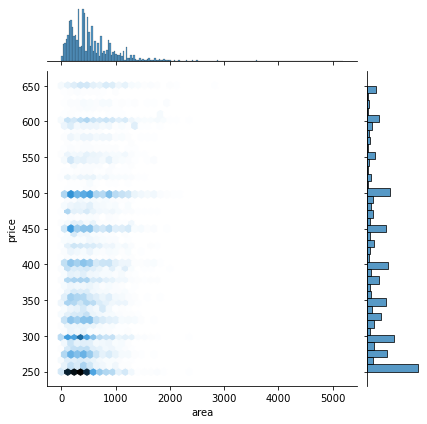

In [784]:
sns.jointplot(x='area',y='price',data=all_paintings_df,kind='hex')

C:\Users\matte\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

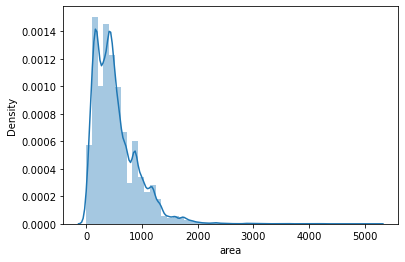

In [785]:
sns.distplot(all_paintings_df['area'])

In [786]:
pd.set_option('display.max_colwidth',100)
all_paintings_df.sort_values(by='area', ascending=False)[['length','width','height','aspect_ratio','area','weight','price','url']].head(20)

,length,width,height,aspect_ratio,area,weight,price,url
45682,72.0,1.5,72.0,1.000000,5184.0,320.0,650.00,https://www.etsy.com/listing/1026010266/extra-large-resin-art-blue-silver-gold
26871,70.0,50.0,70.0,1.000000,4900.0,240.0,399.99,https://www.etsy.com/listing/861168516/dazzling-acrylic-pour-on-40x60-gallery
37080,70.0,60.0,70.0,1.000000,4900.0,17.0,500.00,https://www.etsy.com/listing/731318345/personalized-gift-hand-made-portrait
43083,68.0,46.0,68.0,1.000000,4624.0,64.0,600.00,https://www.etsy.com/listing/720657853/sparrow-diamond
15939,65.0,35.0,65.0,1.000000,4225.0,640.0,310.00,https://www.etsy.com/listing/661729775/abstract-painting
20642,70.0,7.0,60.0,1.166667,4200.0,240.0,350.00,https://www.etsy.com/listing/582637862/abstract-acrylic-painting-snowy-day
30720,70.0,12.0,60.0,1.166667,4200.0,240.0,450.00,https://www.etsy.com/listing/157110151/art-fairy-painting-green-forest-painting
36448,70.0,4.0,60.0,1.166667,4200.0,160.0,500.00,https://www.etsy.com/listing/541786250/soulmate
44978,70.0,7.0,60.0,1.166667,4200.0,240.0,650.00,https://www.etsy.com/listing/596452185/tiger-extra-large-acrylic-painting-sabir
27454,70.0,58.0,5.0,1.206897,4060.0,160.0,400.00,https://www.etsy.com/listing/737245543/sold-brown-3-piece-geode-art


In [787]:
#I checked and most of the above were outliers, in that either the same number was reported on both height and length, or the reported unit was wrong, or the numbers were flat out reported wrong
#So there will certainly be noise in these numbers, as well as in the aspect ratio and area numbers

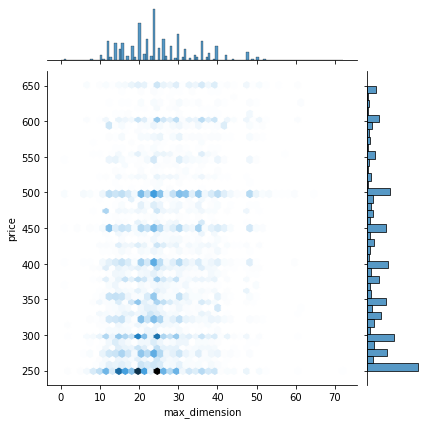

In [788]:
#Let's try with max dimension that may be more robust to outliers
sns.jointplot(x='max_dimension',y='price',data=all_paintings_df,kind='hex')

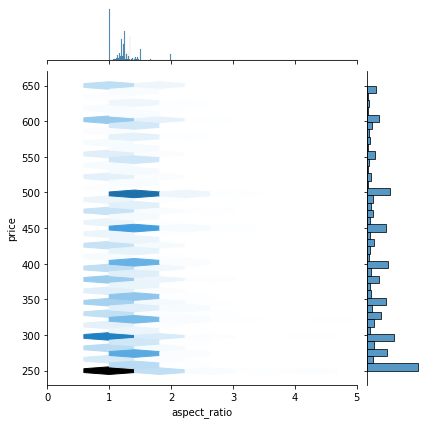

In [789]:
#aspect ratio looks even more prone to outliers than the area or max_dimension
sns.jointplot(x='aspect_ratio',y='price',data=all_paintings_df,kind='hex',xlim=[0,5])

In [790]:
all_paintings_df.sort_values(by='aspect_ratio', ascending=False)[['length','width','height','aspect_ratio','area','weight','price','url']].head(20)

,length,width,height,aspect_ratio,area,weight,price,url
35640,37.0,1.00,1.00,37.0,37.0,80.0,495.0,https://www.etsy.com/listing/1028839365/bear-painting-oversized-wall-art-large
22846,36.0,1.00,1.00,36.0,36.0,0.5,360.0,https://www.etsy.com/listing/991285989/the-guest-2-36x48
42925,36.0,1.00,1.00,36.0,36.0,82.0,600.0,https://www.etsy.com/listing/642108828/life-stages-original-oil-painting-3
32416,36.0,1.00,1.00,36.0,36.0,1.0,450.0,https://www.etsy.com/listing/977335784/madonna-of-leningrad-bogomater
39005,36.0,1.00,1.00,36.0,36.0,80.0,500.0,https://www.etsy.com/listing/1089510279/kate-moss-supermodel-painting-kate-moss
39004,36.0,1.00,1.00,36.0,36.0,48.0,500.0,https://www.etsy.com/listing/1089481709/telephone-naomi-supermodel-nostalgic-90s
11061,48.0,1.50,1.50,32.0,72.0,160.0,285.0,https://www.etsy.com/listing/769504281/beach-water-ocean-acrylic-blue-abstract
12500,36.0,1.25,1.25,28.8,45.0,128.0,295.0,https://www.etsy.com/listing/939531820/flag-peter-max-watch-wwhite-leather-band
17893,55.0,2.00,2.00,27.5,110.0,128.0,325.0,https://www.etsy.com/listing/862838722/original-large-acrylic-painting-boris
10074,48.0,2.00,2.00,24.0,96.0,80.0,275.0,https://www.etsy.com/listing/1080379269/surah-duha-on-burned-background-sold


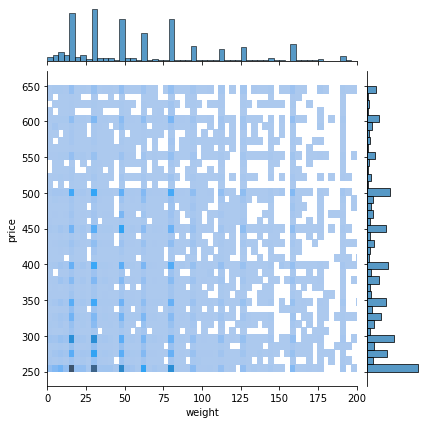

In [791]:
sns.jointplot(x='weight',y='price',data=all_paintings_df,kind='hist',xlim=[0,200])

2) Dependence of price on num favorers and featured rank

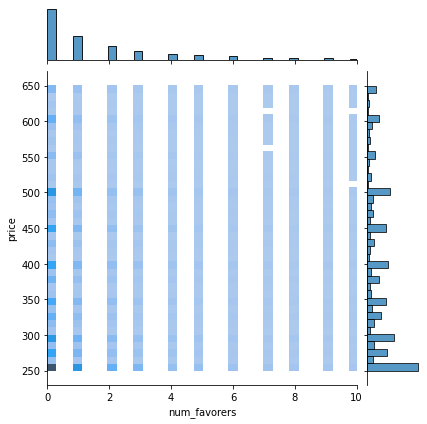

In [792]:
sns.jointplot(x='num_favorers',y='price',data=all_paintings_df,kind='hist',xlim=[0,10])

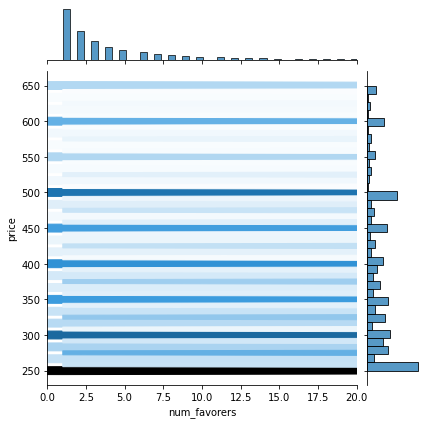

In [793]:
sns.jointplot(x='num_favorers',y='price',data=all_paintings_df[all_paintings_df['num_favorers']>0],kind='hex',xlim=[0,20])

In [794]:
all_paintings_df['num_favorers'].value_counts()

0       16545
1        7919
2        4529
3        2992
4        2099
        ...  
560         1
177         1
465         1
1073        1
959         1
Name: num_favorers, Length: 396, dtype: int64

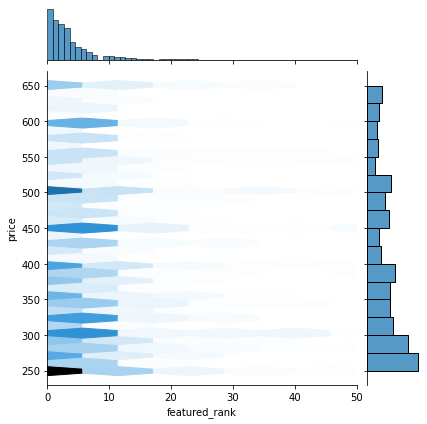

In [795]:
sns.jointplot(x='featured_rank',y='price',data=all_paintings_df[all_paintings_df['featured_rank']>-1],kind='hex',xlim=[0,50])

In [796]:
all_paintings_df['featured_rank'].value_counts()

-1      42110
 0        677
 1        532
 2        480
 3        426
        ...  
 142        1
 206        1
 238        1
 111        1
 223        1
Name: featured_rank, Length: 237, dtype: int64

3) Dependence on time of creation or modification vs price

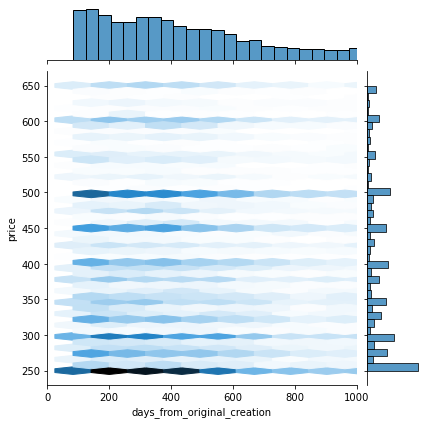

In [797]:
sns.jointplot(x='days_from_original_creation',y='price',data=all_paintings_df,kind='hex',xlim=[0,1000])

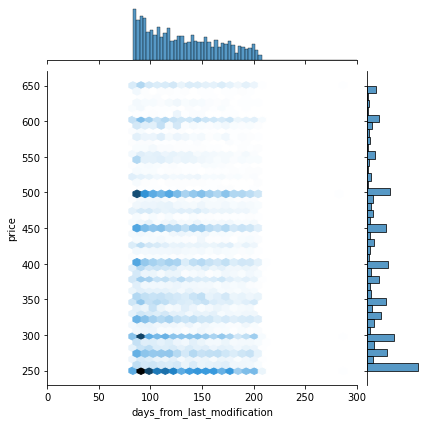

In [798]:
sns.jointplot(x='days_from_last_modification',y='price',data=all_paintings_df,kind='hex',xlim=[0,300])

Categorical features:
    
4) Dependence of price on the taxonomy (watercolors, oil, etc.)

<AxesSubplot:xlabel='painting_type', ylabel='price'>

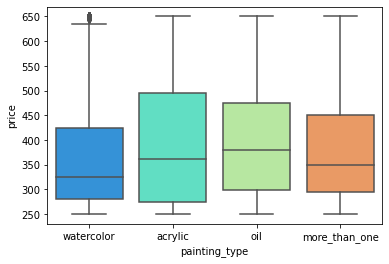

In [799]:
sns.boxplot(x="painting_type", y="price", data=all_paintings_df,palette='rainbow')

5) Dependence of price on when the painting was made (2020's, 2010s, etc)

<AxesSubplot:xlabel='when_made', ylabel='price'>

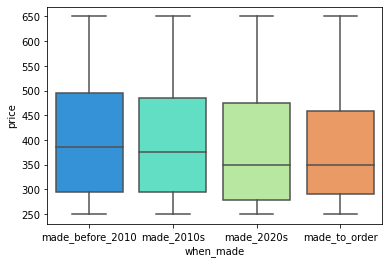

In [800]:
sns.boxplot(x="when_made", y="price", data=all_paintings_df,palette='rainbow')

Boolean features:

6) Painting customizable

<AxesSubplot:xlabel='painting_type', ylabel='price'>

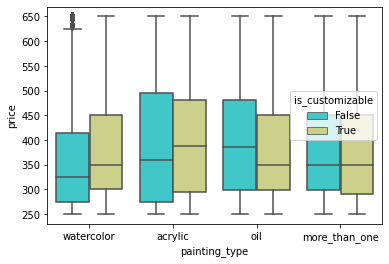

In [801]:
sns.boxplot(x="painting_type", y="price",hue='is_customizable', data=all_paintings_df,palette='rainbow')

7) Painting has variations

<AxesSubplot:xlabel='painting_type', ylabel='price'>

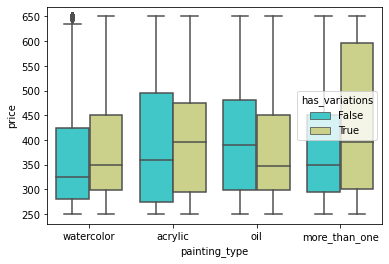

In [802]:
sns.boxplot(x="painting_type", y="price",hue='has_variations', data=all_paintings_df,palette='rainbow')

8) Painting made by seller

<AxesSubplot:xlabel='painting_type', ylabel='price'>

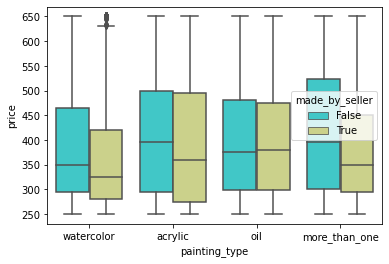

In [803]:
sns.boxplot(x="painting_type", y="price",hue='made_by_seller', data=all_paintings_df,palette='rainbow')

In [804]:
#It looks like many of the numerical or categorical features have a mild predictive power on the price of the painting
#I need to quantify more qualitative features, such as the style of the paintings, its colors, etc.

### Extract style tags from the 'tags' column, and combine with possible 'style' tags already present  

In [805]:
#Let's check how many entries have tags and style information

In [806]:
all_paintings_df['num_style_tags']=all_paintings_df['style'].apply(lambda x:len(eval(x)))

In [807]:
all_paintings_df['num_style_tags'].unique()

array([0, 1, 2], dtype=int64)

In [808]:
all_paintings_df['num_style_tags'].value_counts()

0    41743
2     3619
1      486
Name: num_style_tags, dtype: int64

In [809]:
#Only ~4000 paintings have style tags, but many more have general tags:
all_paintings_df['num_tags']=all_paintings_df['tags'].apply(lambda x:len(eval(x)))

In [810]:
all_paintings_df['num_tags'].unique()

array([ 3, 12,  8, 13,  6,  7,  0,  9, 11,  4, 10,  5,  2,  1],
      dtype=int64)

In [811]:
all_paintings_df['num_tags'].value_counts()

13    22176
0      6241
12     2833
11     1975
8      1766
10     1756
9      1753
7      1631
6      1591
5      1426
4      1116
3       733
1       480
2       371
Name: num_tags, dtype: int64

In [812]:
#Can I find which of these tags are 'style' categorizations so to increase the number of entries which have style tags

In [813]:
#Let's list all the different style tags found in exclusively the 'style' column and create a dictionary

In [814]:
paintings_with_orig_style_tags_df = all_paintings_df[all_paintings_df['num_style_tags']>0]

In [815]:
paintings_with_orig_style_tags_df['style'].iloc[0]

"['Southwestern']"

In [816]:
#convert the style tags from strings representing lists to actual lists
paintings_with_orig_style_tags_df['style']=paintings_with_orig_style_tags_df['style'].apply(lambda x:eval(x))

<ipython-input-816-4b222c6f3fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paintings_with_orig_style_tags_df['style']=paintings_with_orig_style_tags_df['style'].apply(lambda x:eval(x))


In [817]:
paintings_with_orig_style_tags_df['style'].iloc[0]

['Southwestern']

In [818]:
style_all_list = []
[style_all_list.append(style_tag.lower()) 
 for style_tags in paintings_with_orig_style_tags_df['style']
 for style_tag in style_tags if style_tag.lower() not in style_all_list];

In [819]:
style_all_list

['southwestern',
 'folk',
 'modern',
 'abstract',
 'landscape',
 'realism',
 'mediterranean',
 'traditional',
 'expressionist',
 'architectural',
 'beach',
 'nautical',
 'art deco',
 'historical',
 'art nouveau',
 'fantasy',
 'hipster',
 'minimalist',
 'mod',
 'hollywood regency',
 'primitive',
 'country western',
 'rustic',
 'mid century',
 'cottage chic',
 'boho',
 'asian',
 'retro',
 'woodland',
 'tribal',
 'neoclassical',
 'edwardian',
 'zen',
 'renaissance',
 'goth',
 'hippie',
 'high fashion',
 'spooky',
 'avant garde',
 'kitsch',
 'athletic',
 'rocker',
 'automobilia',
 'sci fi',
 'expressionism',
 'photorealism',
 'steampunk',
 'realism expressionism expressionist oil paint',
 'impressionistic',
 'african',
 'impressionism',
 'plein air',
 'impressionist',
 'horror',
 'vintage',
 'pop art',
 'burlesque',
 'expressionism impressionist expressionist',
 'floral',
 'americana american portrait painting realism',
 'impressionism impressionist',
 'antique english landscape watercolor

In [820]:
paintings_with_tags_df = all_paintings_df.query('(num_tags>0) | (num_style_tags>0)')
#paintings_with_tags_df = all_paintings_df[all_paintings_df['num_tags']>0 | all_paintings_df['num_style_tags']>0]

In [821]:
eval(paintings_with_tags_df['tags'].iloc[0]) 

['original painting', 'painting', 'watercolor']

In [822]:
set(eval(paintings_with_tags_df['tags'].iloc[0])).intersection(style_all_list)

set()

In [823]:
set(eval(paintings_with_tags_df['tags'].iloc[10])).intersection(style_all_list)

{'contemporary', 'modern'}

In [824]:
def format_style_tags(tags,style_tags):
    tags_list = [tag.lower() for tag in eval(tags)]
    style_tags_list = [style_tag.lower() for style_tag in eval(style_tags)]
    return list(set(style_tags_list).union(set(tags_list).intersection(style_all_list)))

In [825]:
paintings_with_tags_df['style_tags_new']=paintings_with_tags_df[['tags','style']].apply(lambda x:format_style_tags(x[0],x[1]),axis=1)

<ipython-input-825-39a36bf63911>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paintings_with_tags_df['style_tags_new']=paintings_with_tags_df[['tags','style']].apply(lambda x:format_style_tags(x[0],x[1]),axis=1)


In [826]:
paintings_with_tags_df[['tags','style','style_tags_new']].head(20)

,tags,style,style_tags_new
0,"['original painting', 'painting', 'watercolor']",[],[]
1,"['toys', 'plane', 'vintage', 'children', 'nursery', 'baby', 'decoration', 'original painting', '...",[],[vintage]
2,"['watercolor', 'southwest', 'adobe', 'santa fe', 'new mexico', 'painting', 'architecture', 'hist...",[],[]
3,"['original painting', 'surreal', 'surrealism', 'mouth', 'eye', 'canvas', 'abstract', 'landscape'...",[],"[abstract, landscape]"
4,"['original painting', 'landscape', 'japan', 'kanazawa', 'streetscape', 'architecture']",[],"[streetscape, landscape]"
5,"['landscape', 'adobe', 'santa fe', 'new mexico', 'historic', 'architecture', 'cityscape']",['Southwestern'],"[southwestern, cityscape, landscape]"
6,"['Garden of pink roses', 'watercolor painting', 'elegant rose art', 'original painting', 'pink r...",[],[]
7,"['japanese wildlife', 'japan wildlife art', 'original watercolor', 'watercolor painting', 'anima...",[],[]
9,"['custom portrait', 'Pet portrait', 'Custom pet portrait', 'Animal portrait', 'Made to order', '...","['Folk', 'Modern']","[modern, folk]"
10,"['pen and ink', 'acrylic ink', 'line', 'blue', 'marine blue', 'water', 'soft', 'teal painting', ...","['Abstract', 'Modern']","[abstract, modern]"


In [827]:
paintings_with_tags_df['num_style_tags_new']=paintings_with_tags_df['style_tags_new'].apply(lambda x:len(x))

<ipython-input-827-855085f46001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paintings_with_tags_df['num_style_tags_new']=paintings_with_tags_df['style_tags_new'].apply(lambda x:len(x))


In [828]:
paintings_with_tags_df['num_style_tags_new'].head(20)

0     0
1     1
2     0
3     2
4     2
5     3
6     0
7     0
9     2
10    2
11    3
12    2
13    2
14    2
15    2
16    0
17    6
18    0
19    0
20    0
Name: num_style_tags_new, dtype: int64

In [829]:
#Let's create a new dataframe with all the entries that have these new style tags
paintings_with_new_style_tags_df = paintings_with_tags_df[paintings_with_tags_df['num_style_tags_new']>0]

In [830]:
len(paintings_with_new_style_tags_df)

19844

In [831]:
paintings_with_new_style_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19844 entries, 1 to 45844
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   19844 non-null  int64  
 1   user_id                      19844 non-null  int64  
 2   shop_id                      19844 non-null  int64  
 3   title                        19844 non-null  object 
 4   description                  19844 non-null  object 
 5   shop_section_id              13228 non-null  float64
 6   featured_rank                19844 non-null  int64  
 7   url                          19844 non-null  object 
 8   num_favorers                 19844 non-null  int64  
 9   is_customizable              19844 non-null  bool   
 10  tags                         19844 non-null  object 
 11  materials                    19844 non-null  object 
 12  shipping_profile_id          13658 non-null  float64
 13  when_made       

In [832]:
paintings_with_new_style_tags_df.drop(['num_style_tags','num_tags','num_style_tags_new'],axis=1,inplace=True)

C:\Users\matte\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [833]:
paintings_with_new_style_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19844 entries, 1 to 45844
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   19844 non-null  int64  
 1   user_id                      19844 non-null  int64  
 2   shop_id                      19844 non-null  int64  
 3   title                        19844 non-null  object 
 4   description                  19844 non-null  object 
 5   shop_section_id              13228 non-null  float64
 6   featured_rank                19844 non-null  int64  
 7   url                          19844 non-null  object 
 8   num_favorers                 19844 non-null  int64  
 9   is_customizable              19844 non-null  bool   
 10  tags                         19844 non-null  object 
 11  materials                    19844 non-null  object 
 12  shipping_profile_id          13658 non-null  float64
 13  when_made       

### Save (if it doesn't already exist) the subset of paintings that have style tags into a new file for further processing

In [834]:
min_price = 250.0

csv_combined_filename_w_style = f'./Git_exclude/Data/all_paintings_from_USD{int(min_price)}_listings_with_style_tags.csv'

#If the file with all the cleaned listing data already exists, I load it, otherwise I create it with the cleaning steps chosen above
try:
    paintings_with_new_style_tags_df = pd.read_csv(csv_combined_filename_w_style)

    print(f'Loaded all listings file {csv_combined_filename_w_style} with some style-related tags, after cleaning up the data.')

except:

    #finally save to .csv file for further processing (machine learning model, etc.) and avoiding to recompute everything late
    paintings_with_new_style_tags_df.to_csv(csv_combined_filename_w_style,index=False)
    print(f'Saved all listings file {csv_combined_filename_w_style} with some style-related tags, after cleaning up the data.')
    

Saved all listings file ./Git_exclude/Data/all_paintings_from_USD250_listings_with_style_tags.csv with some style-related tags, after cleaning up the data.


# PART 4: Download Listing IMAGE information (urls of jpeg images, mean colors, etc.) - but not yet the images themselves - at least for the listings with style tags 

### Investigate information available about the images associated to a listing

In [718]:
#What I am interested though are the methods to get the listing image or images associated with a painting: getListingImage or get ListingImages
#e.g. to get the images associated with the first painting above:

paintings_with_new_style_tags_df.iloc[0]['shop_id']

5800355

In [713]:
#url of the listing
paintings_with_new_style_tags_df.iloc[0]['url']

'https://www.etsy.com/listing/40722367/us-mail-plane'

In [708]:
url_listing_images = 'https://openapi.etsy.com/v3/application/shops/{shop_id}/listings/{listing_id}/images'.format(shop_id=paintings_with_new_style_tags_df.iloc[0]['shop_id'],listing_id=paintings_with_new_style_tags_df.iloc[0]['listing_id'])
url_listing_images

'https://openapi.etsy.com/v3/application/shops/5800355/listings/40722367/images'

In [709]:
response_listing_images = requests.get(url_listing_images, headers = headers)
response_listing_images_data = response_listing_images.json() 

In [710]:
response_listing_images_data

{'count': 3,
 'results': [{'listing_id': 40722367,
   'listing_image_id': 1139187801,
   'hex_code': '7F6756',
   'red': 127,
   'green': 103,
   'blue': 86,
   'hue': 25,
   'saturation': 32,
   'brightness': 49,
   'is_black_and_white': False,
   'creation_tsz': 1480217318,
   'rank': 1,
   'url_75x75': 'https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_75x75.1139187801_70dq.jpg',
   'url_170x135': 'https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_170x135.1139187801_70dq.jpg',
   'url_570xN': 'https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_570xN.1139187801_70dq.jpg',
   'url_fullxfull': 'https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_fullxfull.1139187801_70dq.jpg',
   'full_height': 330,
   'full_width': 330},
  {'listing_id': 40722367,
   'listing_image_id': 123489056,
   'hex_code': 'FFFFFF',
   'red': 255,
   'green': 255,
   'blue': 255,
   'hue': 0,
   'saturation': 0,
   'brightness': 100,
   'is_black_and_white': False,
   'creation_t

In [711]:
sample_listing_all_images_df =  pd.DataFrame(response_listing_images_data['results'])
sample_listing_all_images_df

,listing_id,listing_image_id,hex_code,red,green,blue,hue,saturation,brightness,is_black_and_white,creation_tsz,rank,url_75x75,url_170x135,url_570xN,url_fullxfull,full_height,full_width
0,40722367,1139187801,7F6756,127,103,86,25,32,49,False,1480217318,1,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_75x75.1139187801_70dq.jpg,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_170x135.1139187801_70dq.jpg,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_570xN.1139187801_70dq.jpg,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_fullxfull.1139187801_70dq.jpg,330,330
1,40722367,123489056,FFFFFF,255,255,255,0,0,100,False,1299877281,2,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_75x75.123489056.jpg,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_170x135.123489056.jpg,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_570xN.123489056.jpg,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_fullxfull.123489056.jpg,336,448
2,40722367,123489746,FFFFFF,255,255,255,0,0,100,False,1299877281,3,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_75x75.123489746.jpg,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_170x135.123489746.jpg,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_570xN.123489746.jpg,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_fullxfull.123489746.jpg,336,448


In [140]:
#Note that the mean colors are provided for each image... but are they the colors of the painting or of the image (in which the painted is often photographed in a room, etc.)?
#Let's investigate

In [716]:
#Let me check by importing for example the first image and computing average colors myself. 
#We'll download the 570xN version of the image
url_listing_sample_image_570N = 'https://openapi.etsy.com/v3/application/shops/{shop_id}/listings/{listing_id}/images/{listing_image_id}'.format(shop_id=paintings_with_new_style_tags_df.iloc[0]['shop_id'],
                                                        listing_id=paintings_with_new_style_tags_df.iloc[0]['listing_id'], listing_image_id=sample_listing_all_images_df['listing_image_id'].iloc[0])
url_listing_sample_image_570N



'https://openapi.etsy.com/v3/application/shops/5800355/listings/40722367/images/1139187801'

### Here is the actual loop requesting, organizing and saving all image information for each the listings which has at least some style tags  

In [720]:
from ediblepickle import checkpoint
import os
from urllib.parse import quote

cache_dir = './Git_exclude/cache'
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

In [721]:
import time

In [722]:
from retrying import retry

In [724]:
#This is the main workhorse function to get image data from 1 listing at a time, transform to dataframe and 
#the first decorator saves the results of any call with given parameters to cache, the second one keeps retrying if attempts fail
@retry(stop_max_attempt_number=100,wait_fixed=1000)
@checkpoint(key=lambda args, kwargs: 'listing'+ str(args[1]) + '_image_data.pkl', work_dir=cache_dir)
def get_image_info_single_listing(shop_id,listing_id):
    
    url_listing_images = f'https://openapi.etsy.com/v3/application/shops/{shop_id}/listings/{listing_id}/images'
    
    response_listing_images = requests.get(url_listing_images, headers = headers)
    response_listing_images_data = response_listing_images.json() 

    response_listing_images_df =  pd.DataFrame(response_listing_images_data['results'])
    return response_listing_images_df

In [729]:
paintings_with_new_style_tags_df.iloc[0]

listing_id                                                                                                                40722367
user_id                                                                                                                    9264578
shop_id                                                                                                                    5800355
title                                                                                                                US Mail Plane
description                    This is a painting of one of my favorites from my collection of WWII toys.  This was my uncle&#3...
shop_section_id                                                                                                          6798937.0
featured_rank                                                                                                                   -1
url                                                                            http

In [744]:
temp_shops =[]
temp_listings = []
for shop_id,listing_id in paintings_with_new_style_tags_df[['shop_id','listing_id']].values:
    temp_shops.append(shop_id)
    temp_listings.append(listing_id)
    
    

In [750]:
temp_shops[10]

7560273

In [751]:
temp_listings[10]

116737723

In [752]:
paintings_with_new_style_tags_df.iloc[10]

listing_id                                                                                                               116737723
user_id                                                                                                                   27448890
shop_id                                                                                                                    7560273
title                                                                                                     Street View oil painting
description                    Oil on board, 12&quot;*29.5&quot;\nI only wanted the memory of the place and experience to be se...
shop_section_id                                                                                                         12643705.0
featured_rank                                                                                                                   -1
url                                                                https://www.etsy

In [753]:
#Iterate over all listings in the 'paintings_with_new_style_tags_df' dataframe, and create a new dataframe with the info of all images for each listing
#Then save the dataframe to .csv file 

min_price = 250.0

csv_filename_all_image_info_paintings_w_style = f'./Git_exclude/Data/image_info_all_listings_from_USD{int(min_price)}_with_style_tags.csv'

#If the csv file with all the image info for listings with style info already exists, I load it, otherwise I create it with the following iteration
try:
    image_info_all_paintings_with_new_style_tags_df = pd.read_csv(csv_filename_all_image_info_paintings_w_style)

    print(f'Loaded image data file {csv_filename_all_image_info_paintings_w_style} for all listings with style tags.')

except:
    
    try: #it by any chance there is a version of 'image_info_all_paintings_with_new_style_tags_df' around, I delete it
        del image_info_all_paintings_with_new_style_tags_df
    except NameError:
        pass
        
    for shop_id,listing_id in paintings_with_new_style_tags_df[['shop_id','listing_id']].values:

        single_listing_all_image_info_df = get_image_info_single_listing(shop_id,listing_id)

        try:
            image_info_all_paintings_with_new_style_tags_df = pd.concat([image_info_all_paintings_with_new_style_tags_df, single_listing_all_image_info_df])

        except: #if it's the first listing, I start the dataframe that will eventually contain info for all listings
            image_info_all_paintings_with_new_style_tags_df = single_listing_all_image_info_df

        time.sleep(1)
    
    #save to .csv file
    image_info_all_paintings_with_new_style_tags_df.to_csv(csv_filename_all_image_info_paintings_w_style,index=False)
    print(f'Saved image data file {csv_filename_all_image_info_paintings_w_style} for all listings with style tags.')
    

KeyError: 'results'

In [726]:
#check the image information for the first listing

In [756]:
len(image_info_all_paintings_with_new_style_tags_df)

40570

In [757]:
image_info_all_paintings_with_new_style_tags_df.head(10)

,listing_id,listing_image_id,hex_code,red,green,blue,hue,saturation,brightness,is_black_and_white,creation_tsz,rank,url_75x75,url_170x135,url_570xN,url_fullxfull,full_height,full_width
0,40722367,1139187801,7F6756,127.0,103.0,86.0,25.0,32.0,49.0,False,1480217318,1,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_75x75.1139187801_70dq.jpg,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_170x135.1139187801_70dq.jpg,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_570xN.1139187801_70dq.jpg,https://i.etsystatic.com/5800355/r/il/dcfe50/1139187801/il_fullxfull.1139187801_70dq.jpg,330,330
1,40722367,123489056,FFFFFF,255.0,255.0,255.0,0.0,0.0,100.0,False,1299877281,2,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_75x75.123489056.jpg,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_170x135.123489056.jpg,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_570xN.123489056.jpg,https://i.etsystatic.com/5800355/r/il/327acf/123489056/il_fullxfull.123489056.jpg,336,448
2,40722367,123489746,FFFFFF,255.0,255.0,255.0,0.0,0.0,100.0,False,1299877281,3,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_75x75.123489746.jpg,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_170x135.123489746.jpg,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_570xN.123489746.jpg,https://i.etsystatic.com/5800355/r/il/3fbb57/123489746/il_fullxfull.123489746.jpg,336,448
0,52229780,160763238,69685F,105.0,104.0,95.0,54.0,9.0,41.0,False,1299877281,1,https://i.etsystatic.com/5315957/r/il/44578a/160763238/il_75x75.160763238.jpg,https://i.etsystatic.com/5315957/r/il/44578a/160763238/il_170x135.160763238.jpg,https://i.etsystatic.com/5315957/r/il/44578a/160763238/il_570xN.160763238.jpg,https://i.etsystatic.com/5315957/r/il/44578a/160763238/il_fullxfull.160763238.jpg,800,640
1,52229780,160763263,5A584D,90.0,88.0,77.0,50.0,14.0,35.0,False,1299877281,2,https://i.etsystatic.com/5315957/r/il/e312fd/160763263/il_75x75.160763263.jpg,https://i.etsystatic.com/5315957/r/il/e312fd/160763263/il_170x135.160763263.jpg,https://i.etsystatic.com/5315957/r/il/e312fd/160763263/il_570xN.160763263.jpg,https://i.etsystatic.com/5315957/r/il/e312fd/160763263/il_fullxfull.160763263.jpg,450,600
0,55639432,172173593,989189,152.0,145.0,137.0,32.0,9.0,59.0,False,1299877281,1,https://i.etsystatic.com/5889085/r/il/108aae/172173593/il_75x75.172173593.jpg,https://i.etsystatic.com/5889085/r/il/108aae/172173593/il_170x135.172173593.jpg,https://i.etsystatic.com/5889085/r/il/108aae/172173593/il_570xN.172173593.jpg,https://i.etsystatic.com/5889085/r/il/108aae/172173593/il_fullxfull.172173593.jpg,720,455
1,55639432,1351294533,8F8C8A,143.0,140.0,138.0,24.0,3.0,56.0,False,1506099060,2,https://i.etsystatic.com/5889085/r/il/c3fdff/1351294533/il_75x75.1351294533_cl3s.jpg,https://i.etsystatic.com/5889085/r/il/c3fdff/1351294533/il_170x135.1351294533_cl3s.jpg,https://i.etsystatic.com/5889085/r/il/c3fdff/1351294533/il_570xN.1351294533_cl3s.jpg,https://i.etsystatic.com/5889085/r/il/c3fdff/1351294533/il_fullxfull.1351294533_cl3s.jpg,2304,2517
0,60004545,186780693,9FABA7,159.0,171.0,167.0,160.0,7.0,67.0,False,1299877281,1,https://i.etsystatic.com/5889085/r/il/360636/186780693/il_75x75.186780693.jpg,https://i.etsystatic.com/5889085/r/il/360636/186780693/il_170x135.186780693.jpg,https://i.etsystatic.com/5889085/r/il/360636/186780693/il_570xN.186780693.jpg,https://i.etsystatic.com/5889085/r/il/360636/186780693/il_fullxfull.186780693.jpg,638,848
1,60004545,1302048424,8C8F95,140.0,143.0,149.0,220.0,6.0,58.0,False,1505916172,2,https://i.etsystatic.com/5889085/r/il/e041a2/1302048424/il_75x75.1302048424_ta26.jpg,https://i.etsystatic.com/5889085/r/il/e041a2/1302048424/il_170x135.1302048424_ta26.jpg,https://i.etsystatic.com/5889085/r/il/e041a2/1302048424/il_570xN.1302048424_ta26.jpg,https://i.etsystatic.com/5889085/r/il/e041a2/1302048424/il_fullxfull.1302048424_ta26.jpg,2206,2715
0,71158029,231818207,92827D,146.0,130.0,125.0,14.0,14.0,57.0,False,1301532642,1,

In [ ]:
#sanity check that if I group by listing id I should get the same number of listings of the original dataframe with all paintings with style tags

#### Read out the mean colors (and saturation, etc.) for the first image of each listing, and attach it to the original dataframe along with the urls of the image

## PART 5: Download the images themselves

### Let's try to actually download a listing image

In [151]:
response_listing_sample_image = requests.get(url_listing_sample_image_570N, headers = headers)

In [152]:
response_listing_sample_image

<Response [200]>

In [154]:
response_listing_sample_image_data = response_listing_sample_image.json() 

In [156]:
response_listing_sample_image_data.keys()

dict_keys(['listing_id', 'listing_image_id', 'hex_code', 'red', 'green', 'blue', 'hue', 'saturation', 'brightness', 'is_black_and_white', 'creation_tsz', 'rank', 'url_75x75', 'url_170x135', 'url_570xN', 'url_fullxfull', 'full_height', 'full_width'])

In [ ]:
#The above doesn't return the image itself.. only metadata

In [159]:
url_listing_sample_image_570N_img = sample_listing_all_images_df['url_570xN'].iloc[0]
url_listing_sample_image_570N_img

'https://i.etsystatic.com/26357829/r/il/8d32d2/3120353037/il_570xN.3120353037_hxif.jpg'

In [220]:
url_listing_sample_image_full_img = sample_listing_all_images_df['url_fullxfull'].iloc[0]
url_listing_sample_image_full_img

'https://i.etsystatic.com/26357829/r/il/8d32d2/3120353037/il_fullxfull.3120353037_hxif.jpg'

In [163]:
import os

#may need a decorator here to prevent running this if it already ran before, since this is the time consuming step 
def download_image(url, pathname):
    """
    Downloads a file given an URL and puts it in the folder `pathname`
    """
    # if path doesn't exist, make that path dir
    if not os.path.isdir(pathname):
        os.makedirs(pathname)
    # get the file name
    filename = os.path.join(pathname, url.split("/")[-1])
    # download the body of response by chunk, not immediately
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)
    return filename


# import tqdm
#
# def download_image(url, pathname):
#     """
#     Downloads a file given an URL and puts it in the folder `pathname`
#     """
#     # if path doesn't exist, make that path dir
#     if not os.path.isdir(pathname):
#         os.makedirs(pathname)
#     # download the body of response by chunk, not immediately
#     response = requests.get(url, stream=True)
#     # get the total file size
#     file_size = int(response.headers.get("Content-Length", 0))
#     # get the file name
#     filename = os.path.join(pathname, url.split("/")[-1])
#     # progress bar, changing the unit to bytes instead of iteration (default by tqdm)
#     progress = tqdm(response.iter_content(1024), f"Downloading {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
#     with open(filename, "wb") as f:
#         for data in progress.iterable:
#             # write data read to the file
#             f.write(data)
#             # update the progress bar manually
#             progress.update(len(data))


In [164]:
#Test the above code out:

images_folder = './Git_exclude/Painting_images/'

sample_image_570N = download_image(url_listing_sample_image_570N_img,images_folder)


'./Git_exclude/Painting_images/il_570xN.3120353037_hxif.jpg'

In [177]:
#Sample Image processing of the image to make sure to isolate the painting, then computing stats and pass the image to further transformer downstreams.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('./Git_exclude/Painting_images/il_570xN.3120353037_hxif.jpg')

In [178]:
img.dtype

dtype('uint8')

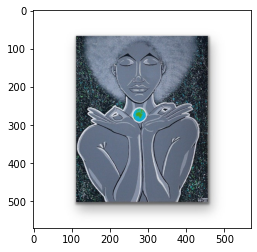

In [196]:
imgplot = plt.imshow(img)

In [304]:
img.shape

(570, 570, 3)

#### Let's check the color properties of the image

In [227]:
#Let's check if the mean colors actually match those reported by the /images request 
import numpy as np

r_mean, g_mean, b_mean = np.mean(img,axis=(0,1))


In [228]:
r_mean

175.06739919975377

In [229]:
g_mean

180.66092336103415

In [261]:
b_mean

187.952004

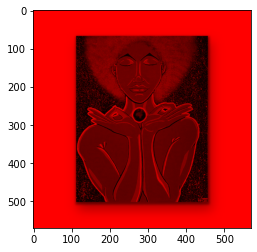

In [202]:
img_red = img.copy()
img_red[:,:,1:]=0
plt.imshow(img_red)

# #Alternatively:
# img_red = np.zeros(img.shape,dtype=int)
# img_red[:,:,0]=img[:,:,0]
# plt.imshow(img_red)

In [235]:
np.mean(img_red,axis=(0,1))

array([175.0673992,   0.       ,   0.       ])

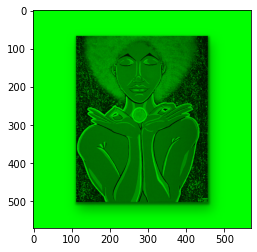

In [211]:
img_green = img.copy()
img_green[:,:,0]=0
img_green[:,:,2]=0
plt.imshow(img_green)

# # #Alternatively:
# img_green = np.zeros(img.shape,dtype=int)
# img_green[:,:,1]=img[:,:,1]
# plt.imshow(img_green)

In [236]:
np.mean(img_green,axis=(0,1))

array([  0.        , 180.66092336,   0.        ])

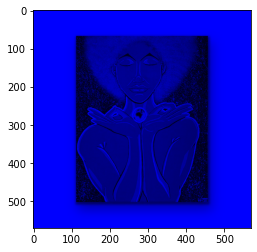

In [218]:
img_blue = img.copy()
img_blue[:,:,:2]=0
plt.imshow(img_blue)

# # #Alternatively:
# img_blue = np.zeros(img.shape,dtype=int)
# img_blue[:,:,2]=img[:,:,2]
# plt.imshow(img_blue)

In [237]:
np.mean(img_blue,axis=(0,1))

array([  0.        ,   0.        , 187.91155125])

In [216]:
img_test = img_red + img_green + img_blue

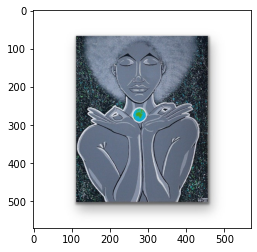

In [217]:
plt.imshow(img_test)

In [221]:
#Note that the average colors don't match those reported... maybe because I am using the image resized to weird dimensions?

In [222]:
#Let's try to load the full size image and see if that works:
sample_image_full = download_image(url_listing_sample_image_full_img,images_folder)

In [240]:
sample_image_full

'./Git_exclude/Painting_images/il_fullxfull.3120353037_hxif.jpg'

In [241]:
img_full = mpimg.imread(sample_image_full)

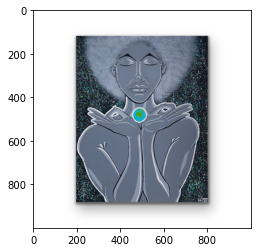

In [242]:
imgplot_full = plt.imshow(img_full)

In [244]:
img_full.shape

(1000, 1000, 3)

In [245]:
r_mean, g_mean, b_mean = np.mean(img_full,axis=(0,1))

In [262]:
r_mean

175.070757

In [264]:
r_mean_nocontour, g_mean_nocontour, b_mean_nocontour = np.mean(img_full[200:800,150:850,:],axis=(0,1))

In [266]:
r_mean_nocontour

110.41776666666667

In [268]:
g_mean_nocontour

121.07627380952381

In [269]:
b_mean_nocontour

134.62788333333333

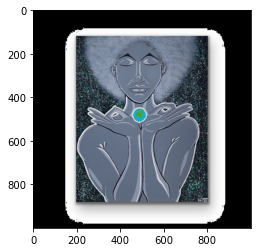

In [271]:
#Maybe the average is computed after removing all white pixels that surround the true image?

img_no_contour = np.zeros(img_full.shape,dtype=int)

img_no_contour[np.where(img_full!=[255,255,255])] = img_full[np.where(img_full!=[255,255,255])]

plt.imshow(img_no_contour)


In [273]:
r_mean_no_contour, g_mean_no_contour, b_mean_no_contour = np.mean(img_no_contour,axis=(0,1))
r_mean_no_contour

85.832232

In [275]:
g_mean_no_contour

91.4604

In [282]:
b_mean_no_contour

98.648964

In [ ]:
r_mean, g_mean, b_mean 

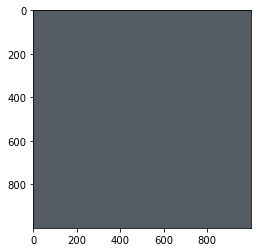

In [290]:
img_mean = np.zeros(img_full.shape,dtype=int)

img_mean[:,:,0] = r_mean_no_contour #r_mean
img_mean[:,:,1] = g_mean_no_contour #g_mean
img_mean[:,:,2] = b_mean_no_contour #b_mean

plt.imshow(img_mean)

### Try a different image of the same listing, with background

In [291]:
url_listing_sample_image_570N_alt = 'https://openapi.etsy.com/v3/application/shops/{shop_id}/listings/{listing_id}/images/{listing_image_id}'.format(shop_id=first_100acrylic_paintings_df.iloc[0]['shop_id'],
                                                        listing_id=first_100acrylic_paintings_df.iloc[0]['listing_id'], listing_image_id=sample_listing_all_images_df['listing_image_id'].iloc[1])
url_listing_sample_image_570N_alt

'https://openapi.etsy.com/v3/application/shops/26357829/listings/1016665059/images/3072618496'

In [292]:
response_listing_sample_image_alt = requests.get(url_listing_sample_image_570N_alt, headers = headers)
response_listing_sample_image_alt


<Response [200]>

In [293]:
response_listing_sample_image_alt_data = response_listing_sample_image_alt.json() 
response_listing_sample_image_alt_data.keys()

dict_keys(['listing_id', 'listing_image_id', 'hex_code', 'red', 'green', 'blue', 'hue', 'saturation', 'brightness', 'is_black_and_white', 'creation_tsz', 'rank', 'url_75x75', 'url_170x135', 'url_570xN', 'url_fullxfull', 'full_height', 'full_width'])

In [294]:
#The above doesn't return the image itself.. only metadata
url_listing_sample_image_570N_img_alt = sample_listing_all_images_df['url_570xN'].iloc[1]
url_listing_sample_image_570N_img_alt

'https://i.etsystatic.com/26357829/r/il/540db4/3072618496/il_570xN.3072618496_4zg7.jpg'

In [296]:
images_folder = './Git_exclude/Painting_images/'
sample_image_570N_alt = download_image(url_listing_sample_image_570N_img_alt,images_folder)

img_alt = mpimg.imread(sample_image_570N_alt)

In [297]:
img_alt = mpimg.imread(sample_image_570N_alt)

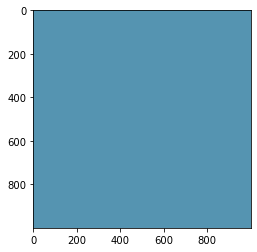

In [298]:
img_alt_mean = np.zeros(img_full.shape,dtype=int)

r_mean_alt, g_mean_alt, b_mean_alt = np.mean(img_alt,axis=(0,1))

img_alt_mean[:,:,0] = r_mean_alt #r_mean
img_alt_mean[:,:,1] = g_mean_alt #g_mean
img_alt_mean[:,:,2] = b_mean_alt #b_mean

plt.imshow(img_alt_mean)

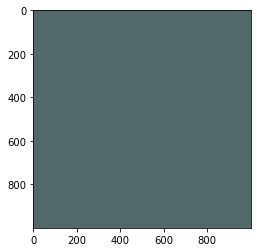

In [300]:
#So the manual average of the image does in fact pick up the background mostly
#Is it the same for the numbers returned by the GET request?

img_alt_mean_listing = np.zeros(img_full.shape,dtype=int)

r_mean_alt_listing = sample_listing_all_images_df['red'].iloc[1]
g_mean_alt_listing = sample_listing_all_images_df['green'].iloc[1]
b_mean_alt_listing = sample_listing_all_images_df['blue'].iloc[1]

img_alt_mean_listing[:,:,0] = r_mean_alt_listing #r_mean
img_alt_mean_listing[:,:,1] = g_mean_alt_listing #g_mean
img_alt_mean_listing[:,:,2] = b_mean_alt_listing #b_mean

plt.imshow(img_alt_mean_listing)

#So the mean colors returned by the listing seems to be robust to the profile, and I can consider it reliable for the most part.


### Get variation images

In [295]:
#Get all variation images for this listing, maybe there's another image with the right size without background?

url_listing_variation_images = 'https://openapi.etsy.com/v3/application/shops/{shop_id}/listings/{listing_id}/variation-images'.format(shop_id=first_100acrylic_paintings_df.iloc[0]['shop_id'],
                                                        listing_id=first_100acrylic_paintings_df.iloc[0]['listing_id'])
url_listing_variation_images

'https://openapi.etsy.com/v3/application/shops/26357829/listings/1016665059/variation-images'

In [248]:
response_listing_variation_images = requests.get(url_listing_variation_images, headers = headers)

In [250]:
response_listing_variation_images = response_listing_variation_imagese

In [251]:
response_listing_variation_images_data = response_listing_variation_images.json() 

In [252]:
response_listing_variation_images_data.keys()

dict_keys(['count', 'results'])

In [285]:
response_listing_variation_images_data['count']

0

### Sample image processing with PIL 

In [281]:
from PIL import ImageFilter, Image, ImageStat

with Image.open(sample_image_full) as im:
    #im.show()
    #im_new = im.filter(ImageFilter.FIND_EDGES)
    #im_new.show()
    print(ImageStat.Stat(im).var)
    


[7150.8723044469525, 6262.51064384, 5368.759188383988]


In [289]:
print(ImageStat.Stat(im).mean)

[175.070757, 180.7104, 187.952004]
